In [2]:
%load_ext autoreload
%autoreload 2
# use IPython extension to automatically reload the imported modules; 
# otherwise after editing a module, changes will not be effective without kernel restart

from globalvars import *
from preprocessings import *

In [3]:
data_buf, descriptions = initialization()
#   data_buf = {'power':[array([time,val]),...], 'force':[array([time,val]),...]}
#   descriptions.columns.values # column titles
#   descriptions.iloc[0,:] ordescriptions.loc[1,:]   # get the first row with attributes

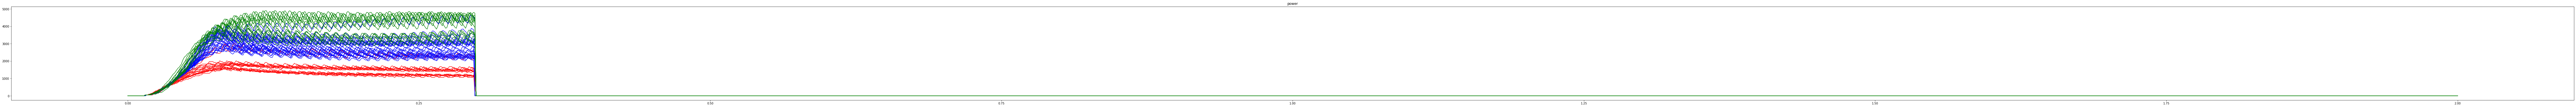

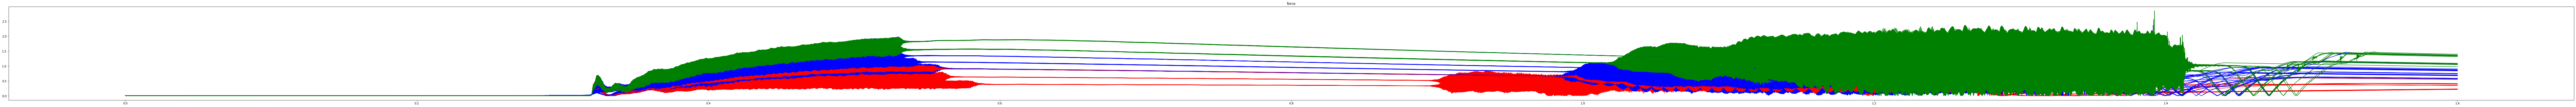

In [4]:
# data visualization

for signal in signal_type:
    fig = plt.figure(figsize = (160, 6))
    class_color={'I':'r', 'II':'g', 'III':'b'}
    l = len(data_buf[signal])
    for i in range(l):
        color_tmp = class_color[descriptions.loc[i+1,'Class Label']]
        plt.title(signal)
        plt.plot(data_buf[signal][i][:,0],data_buf[signal][i][:,1],color=color_tmp)
    plt.show()

In [5]:
### 1. preprocessing

data,seg_ind = segment_all(data_buf)

D:\Users\Frank222\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


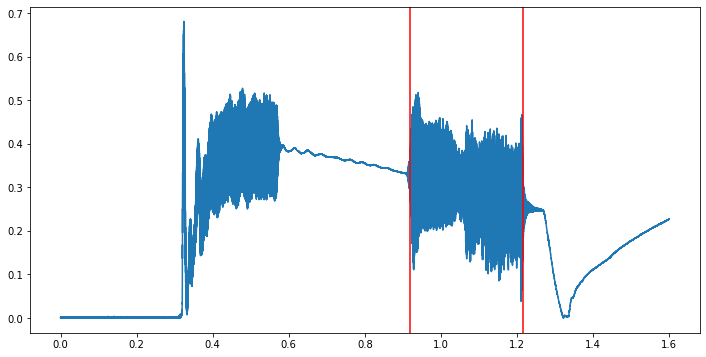

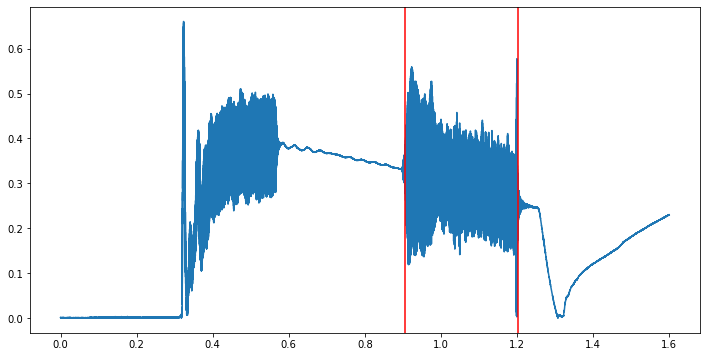

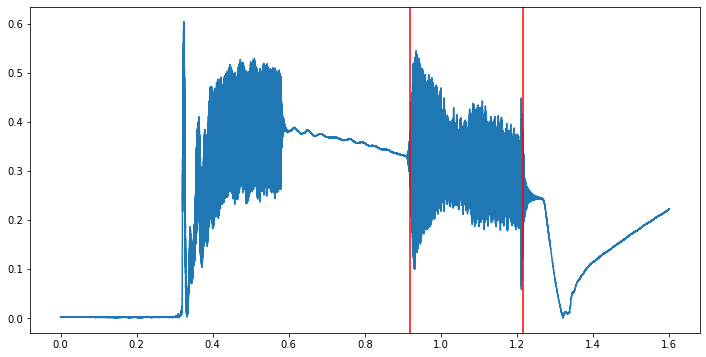

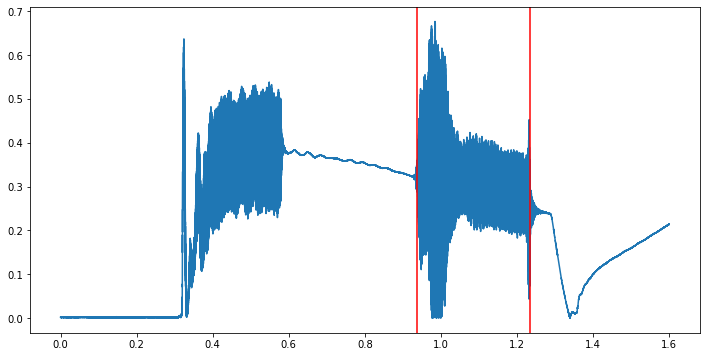

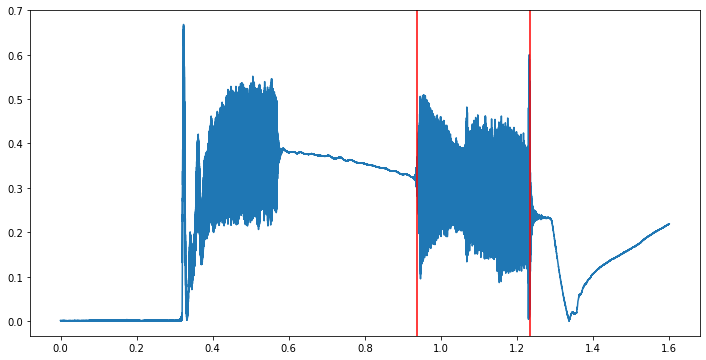

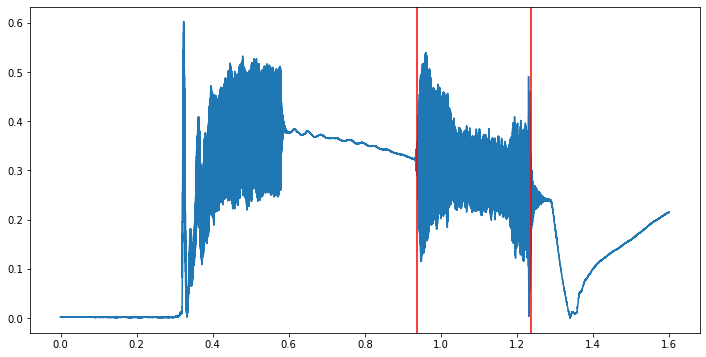

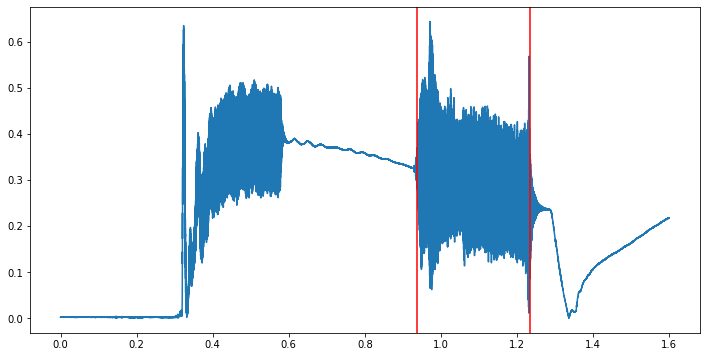

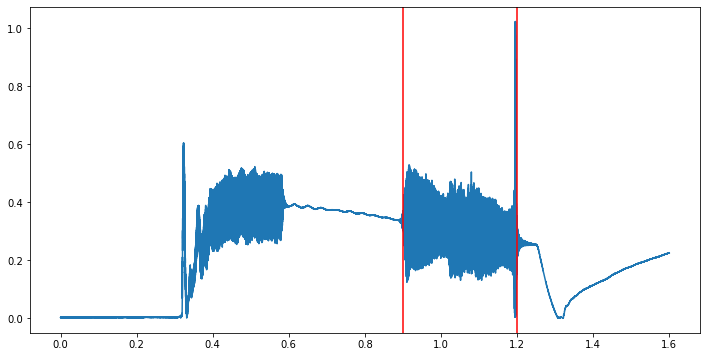

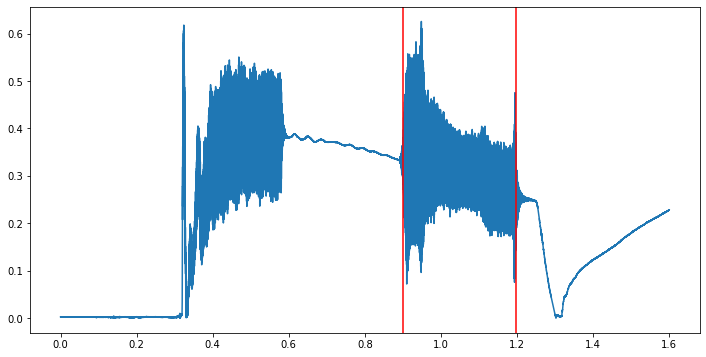

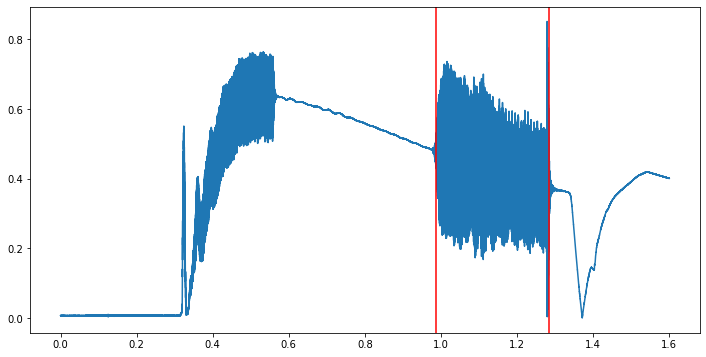

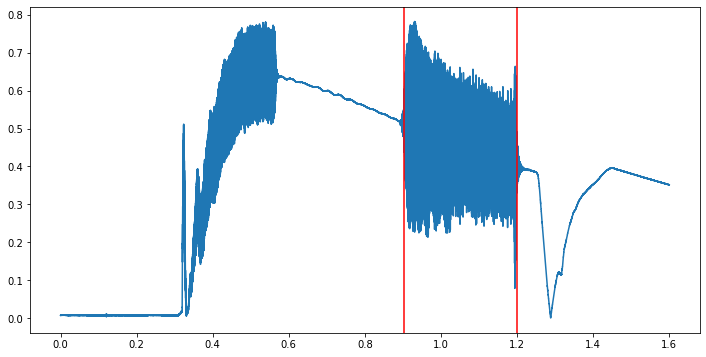

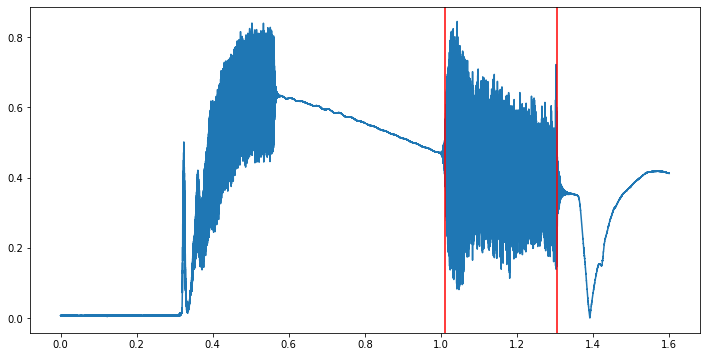

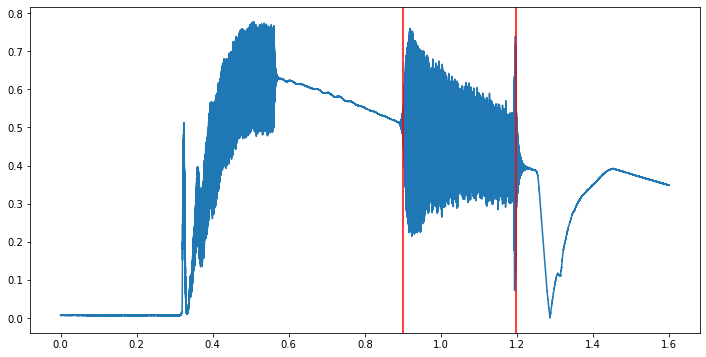

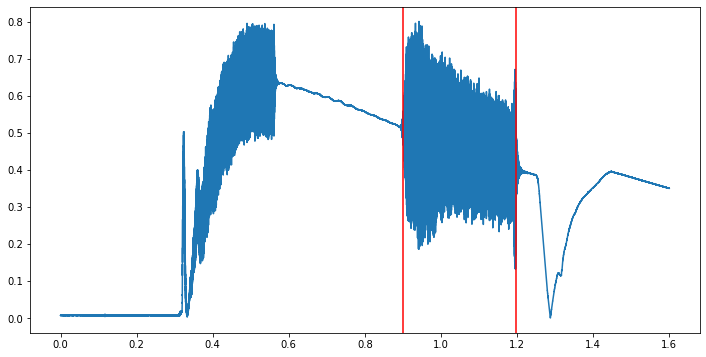

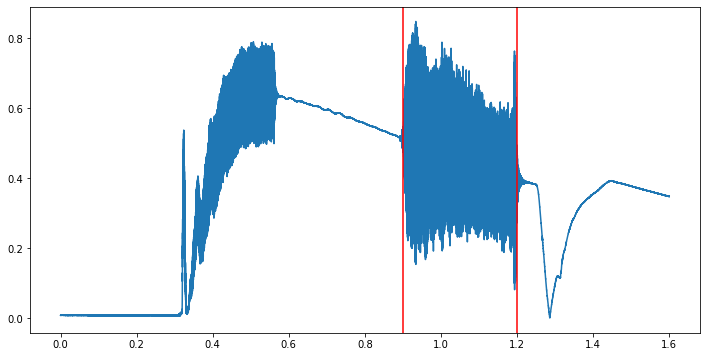

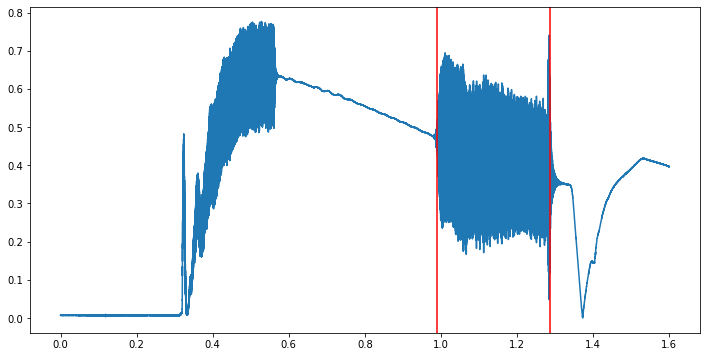

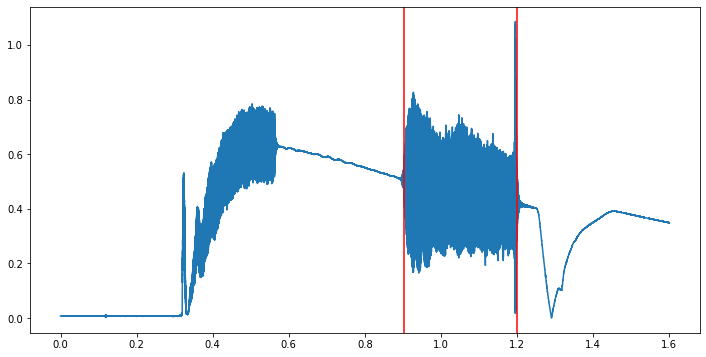

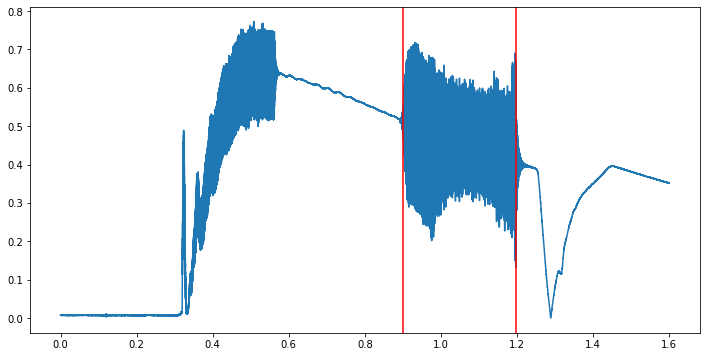

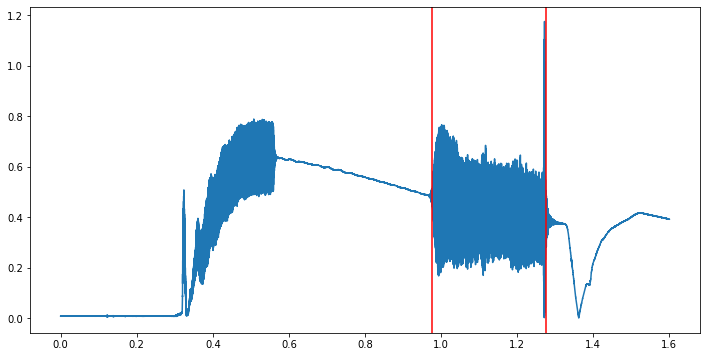

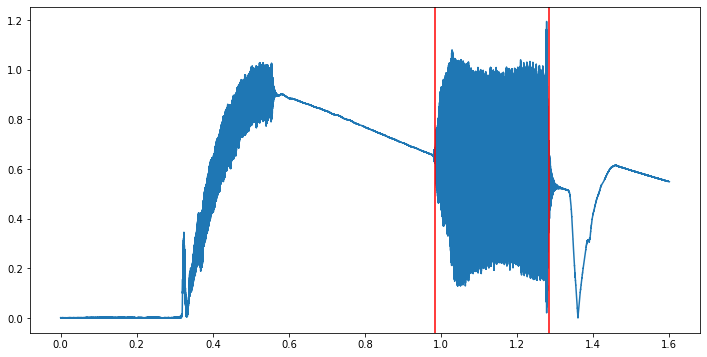

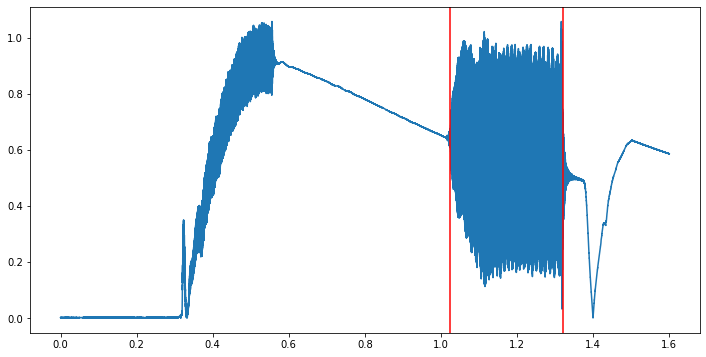

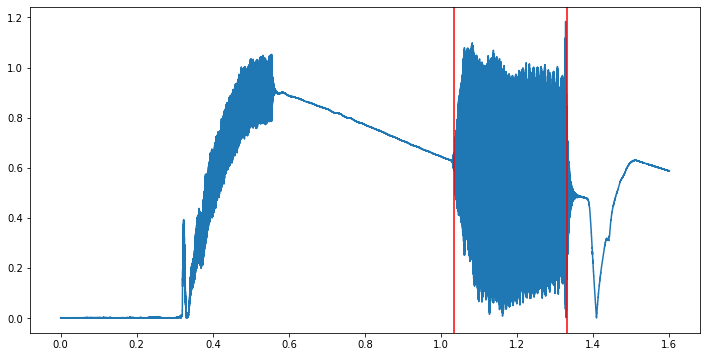

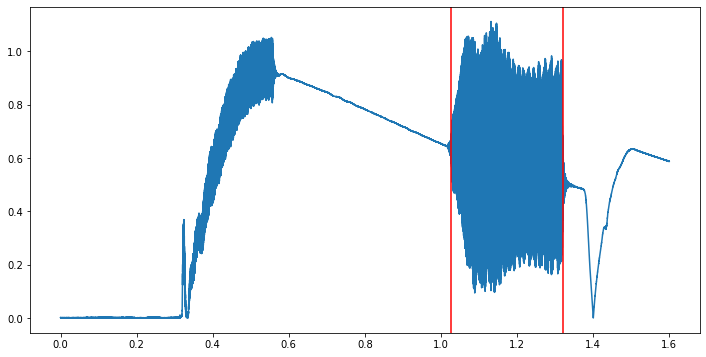

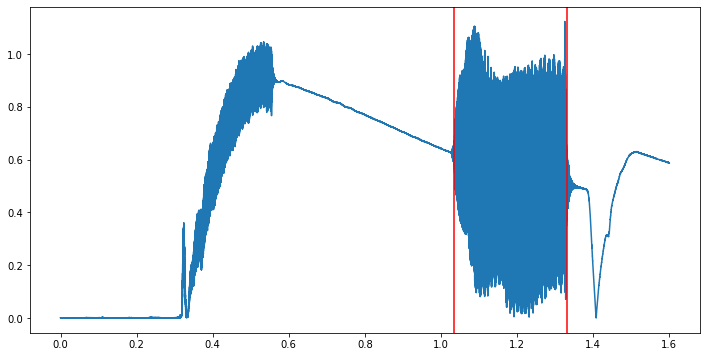

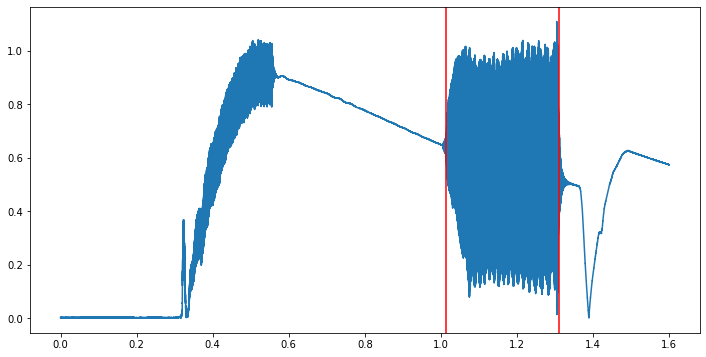

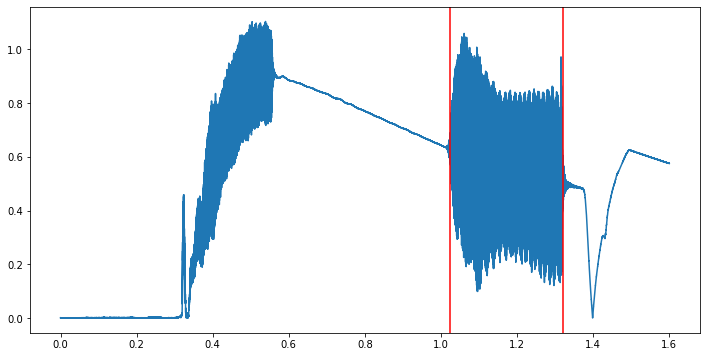

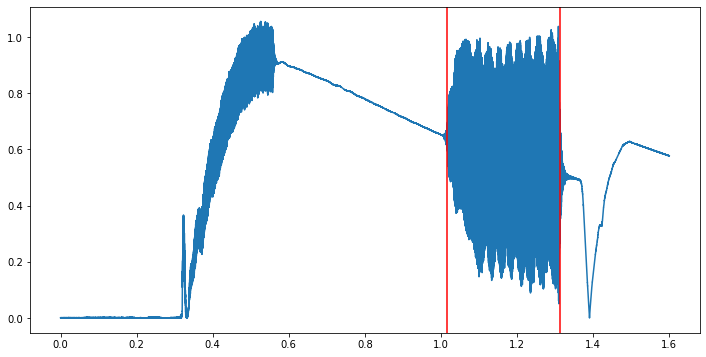

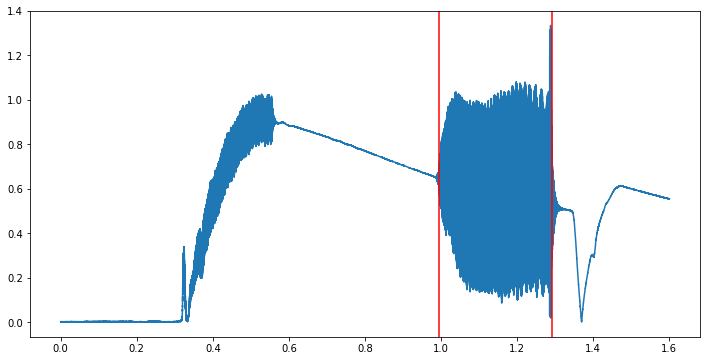

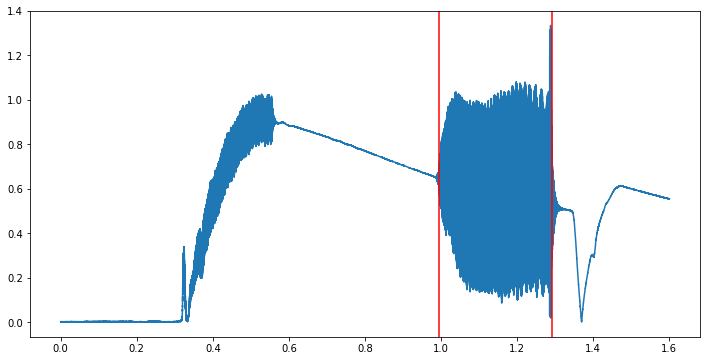

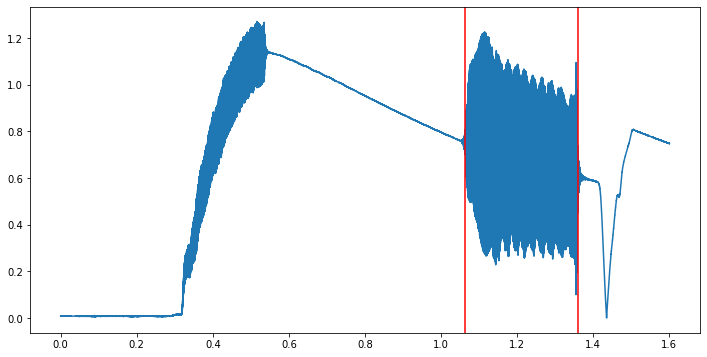

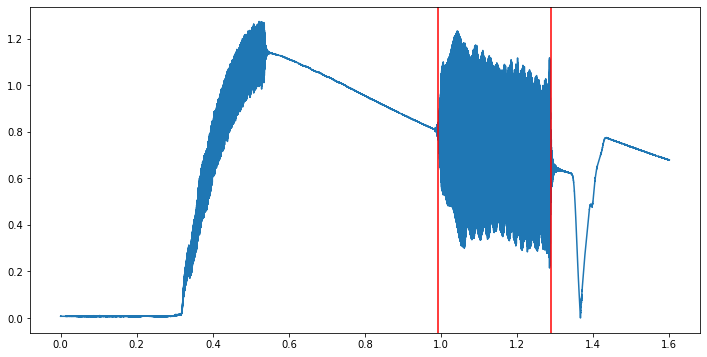

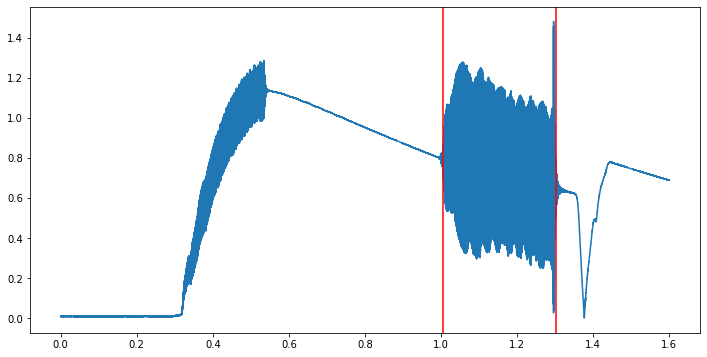

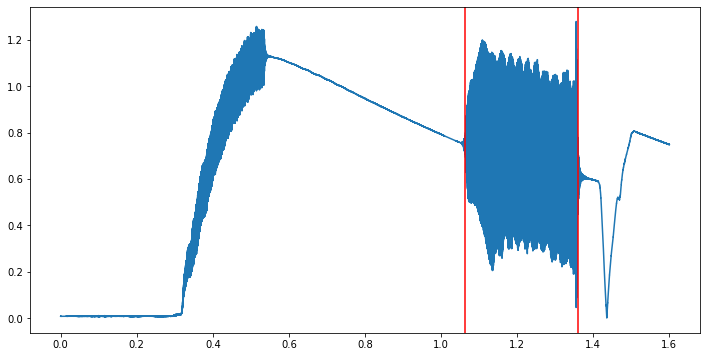

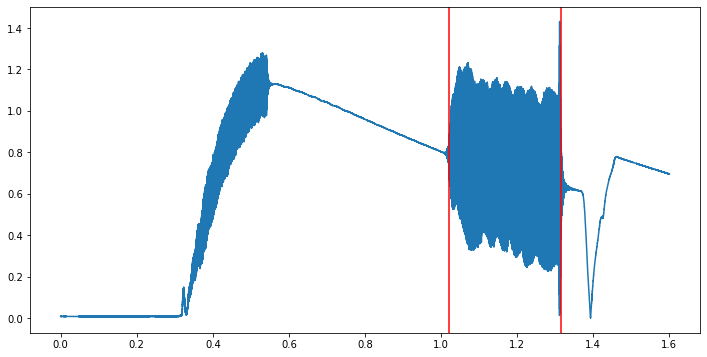

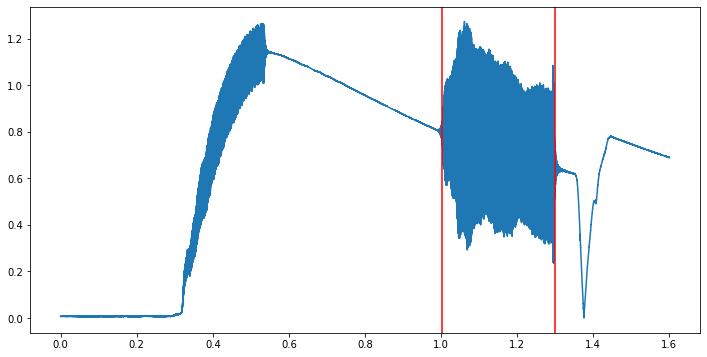

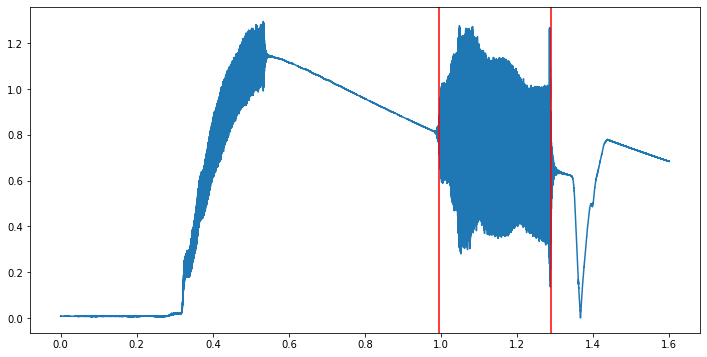

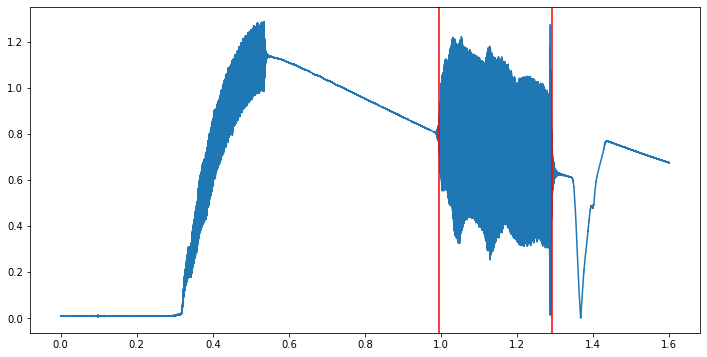

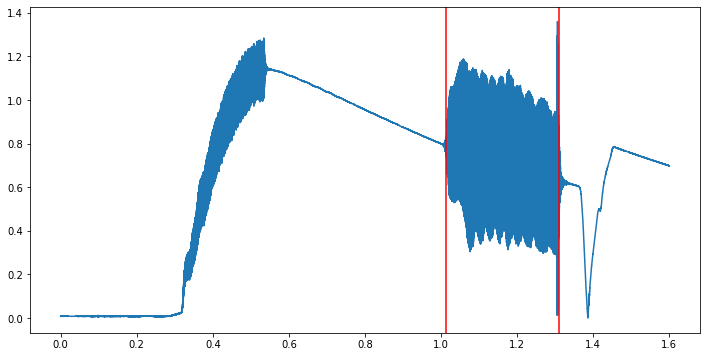

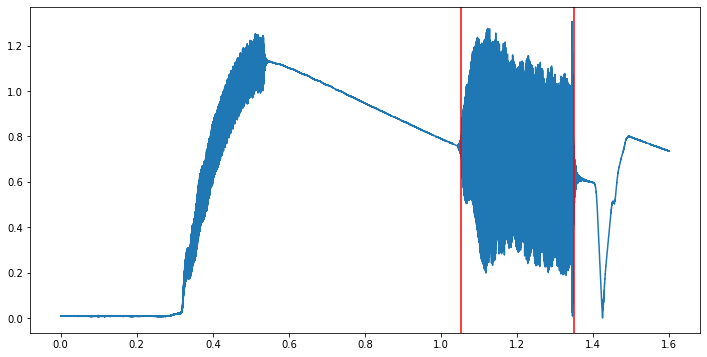

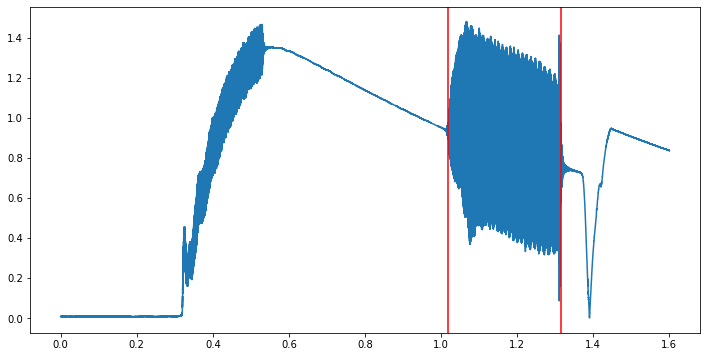

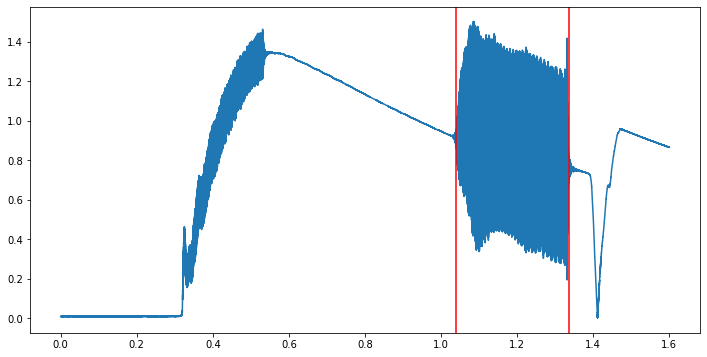

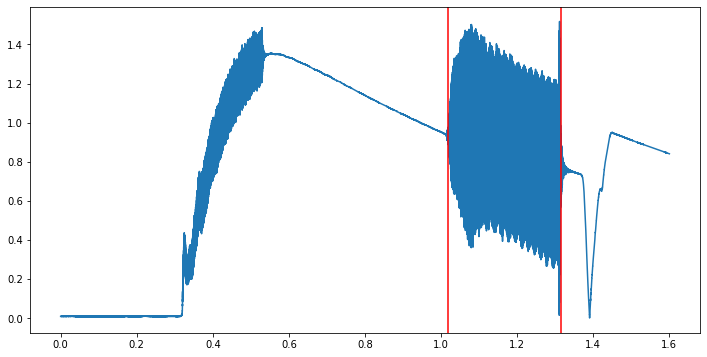

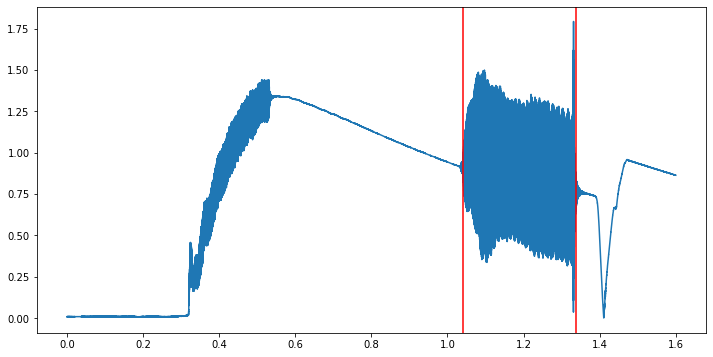

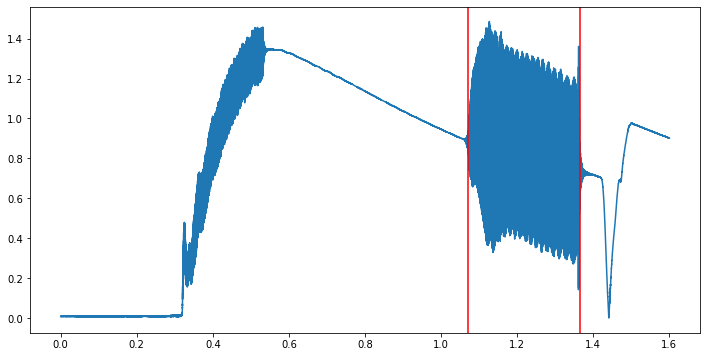

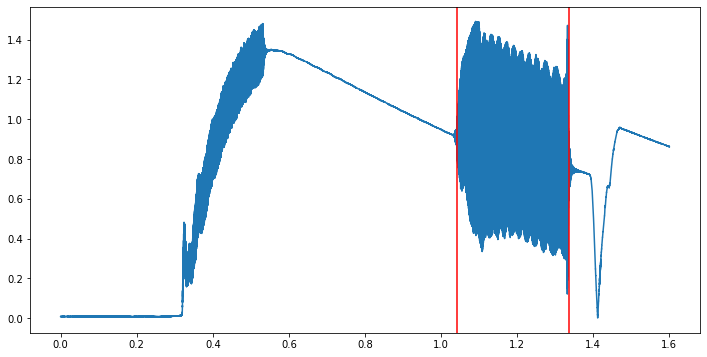

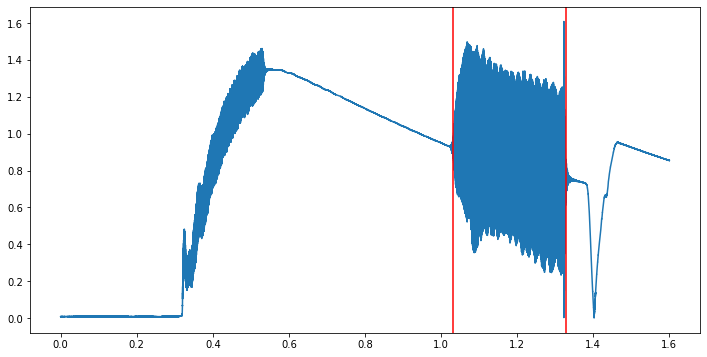

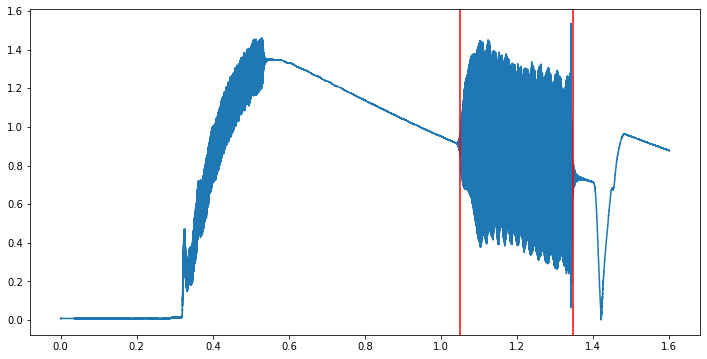

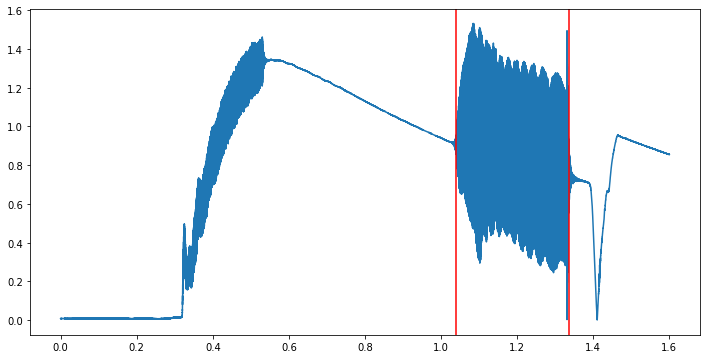

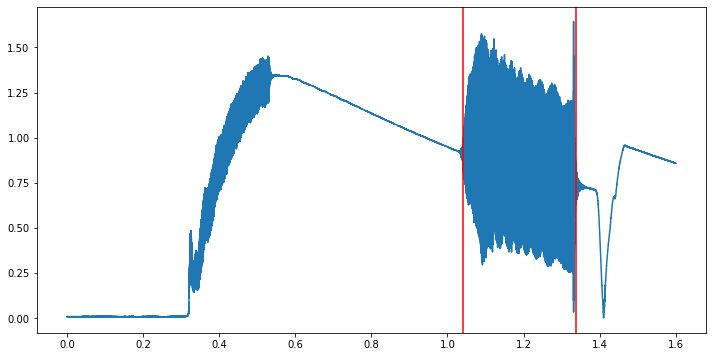

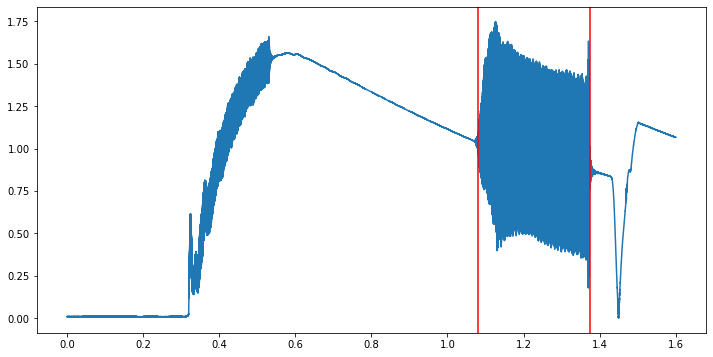

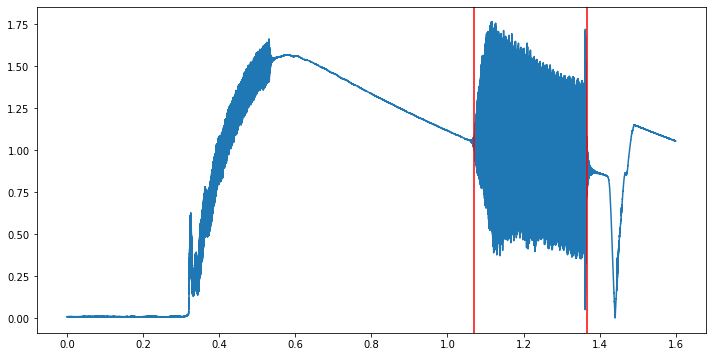

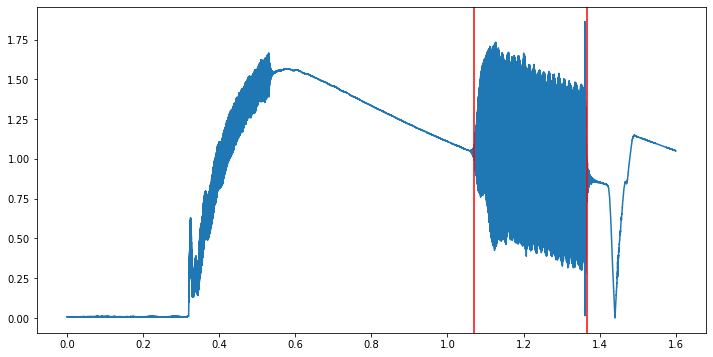

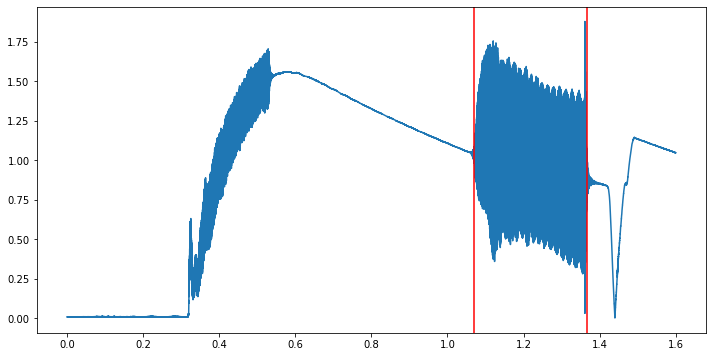

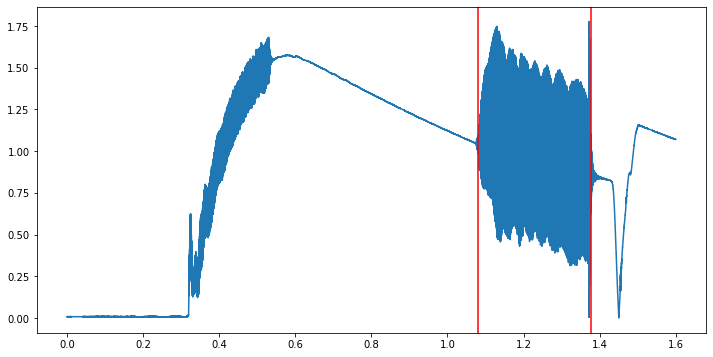

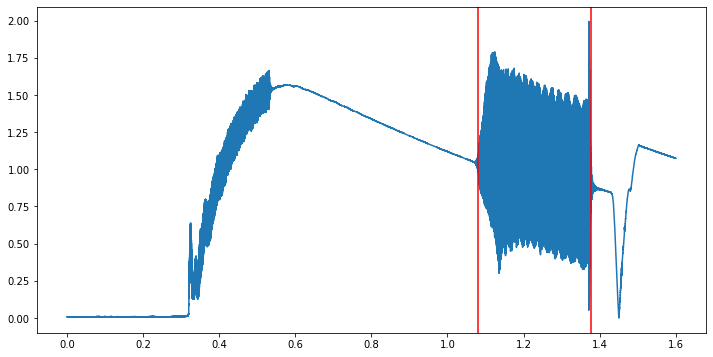

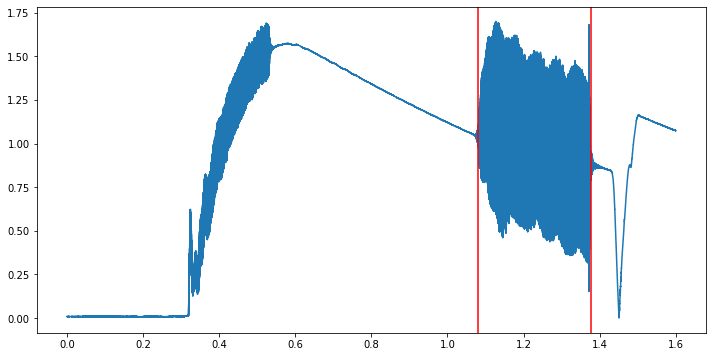

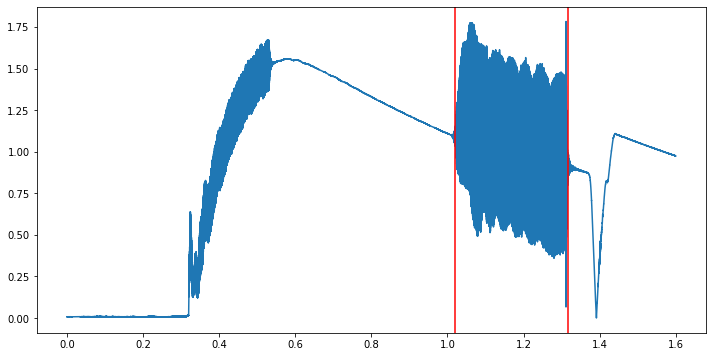

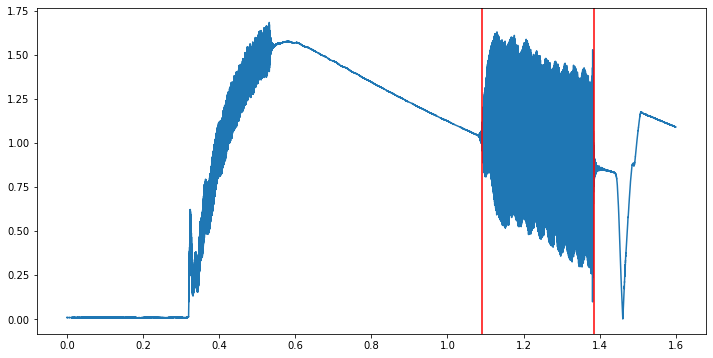

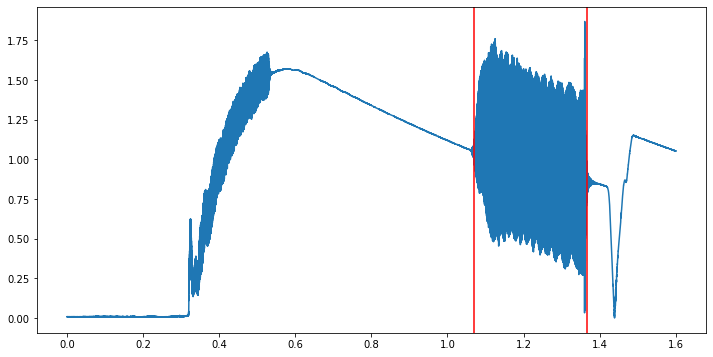

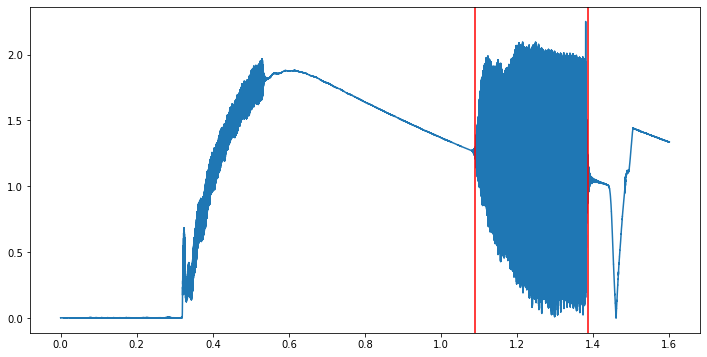

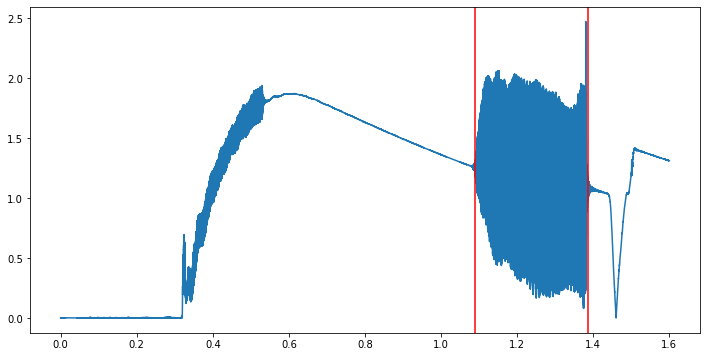

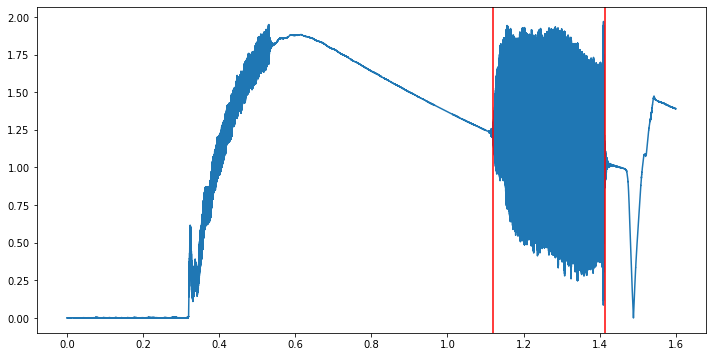

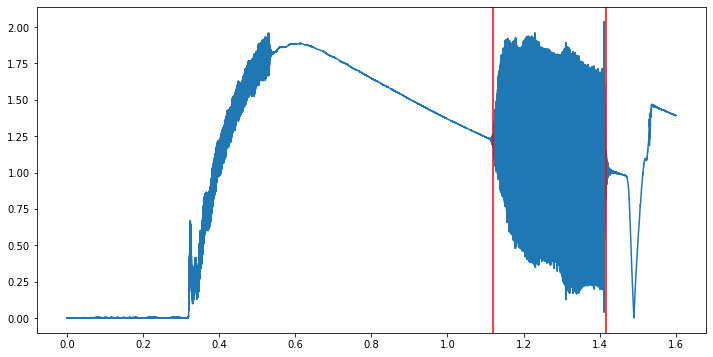

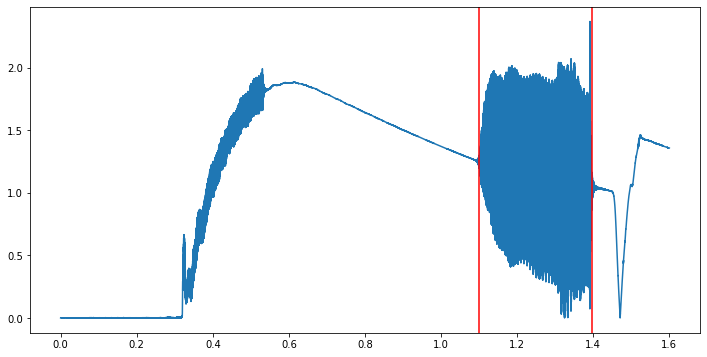

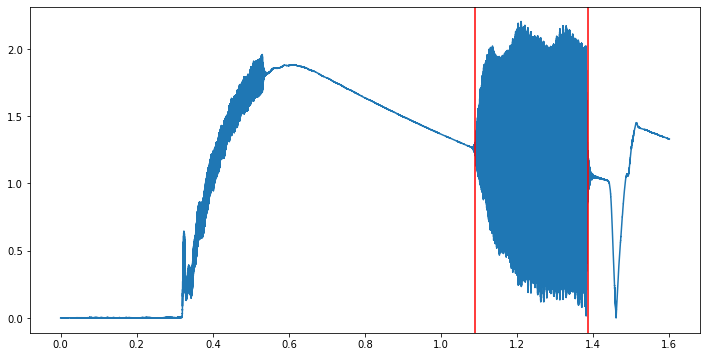

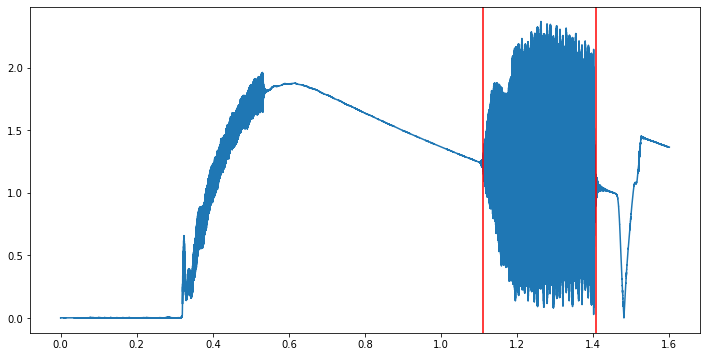

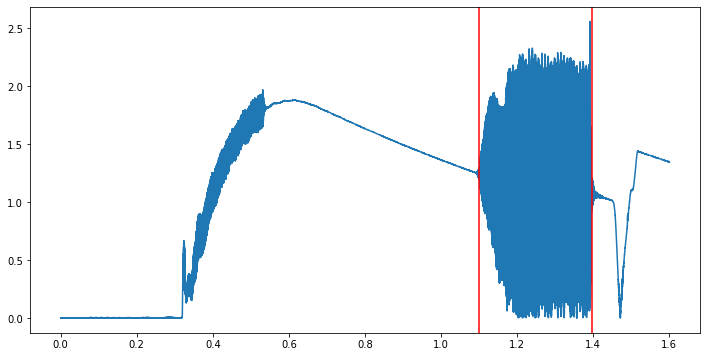

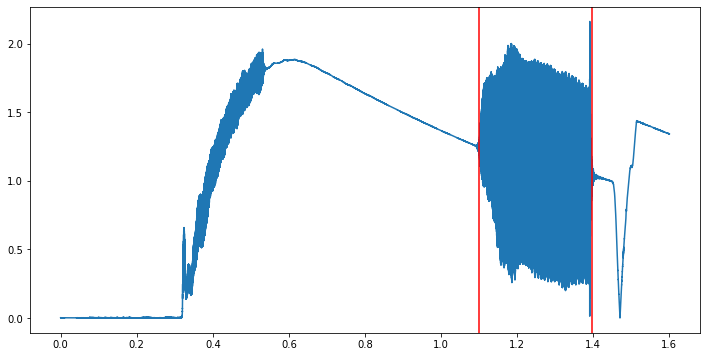

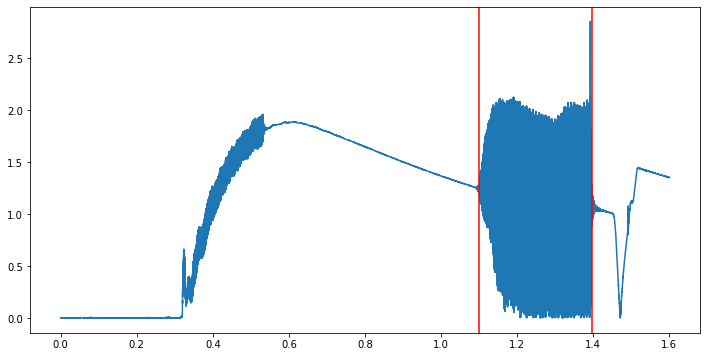

In [8]:
# segmented force signal
for i,sig in enumerate(data_buf['force']):
    fig = plt.figure(figsize=(12, 6))
    plt.plot(sig[:,0],sig[:,1])
    for ind in seg_ind['force'][i]:
        plt.axvline(x=sig[ind,0],color='r')

D:\Users\Frank222\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


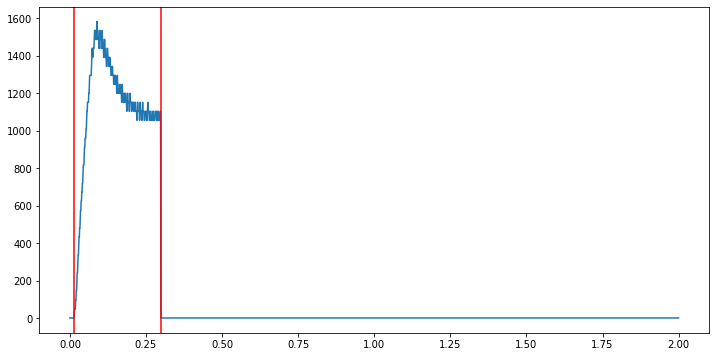

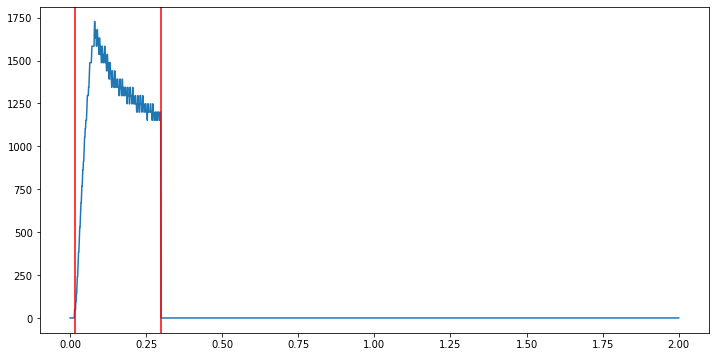

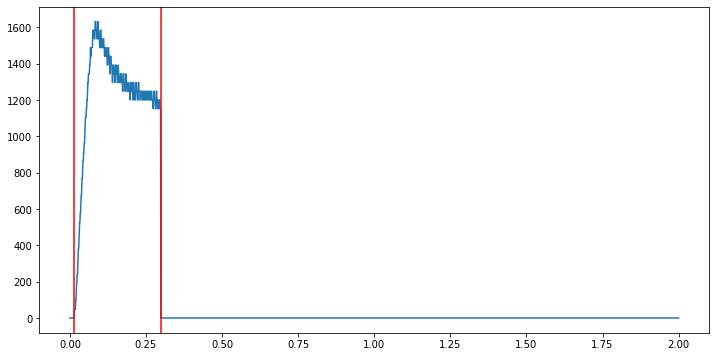

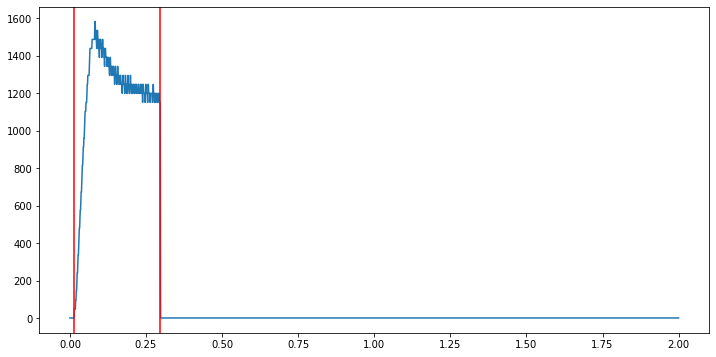

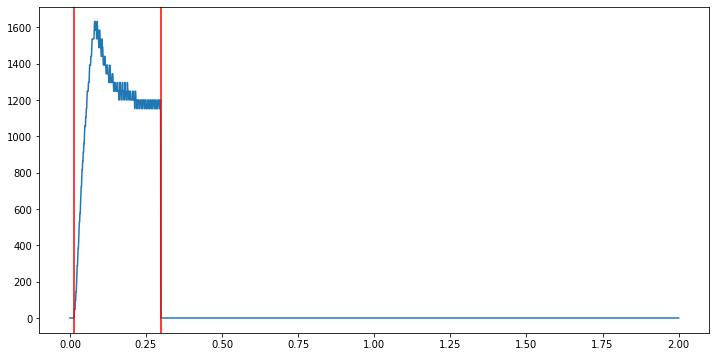

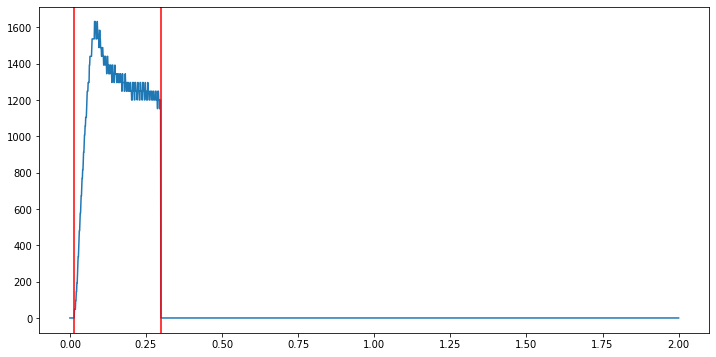

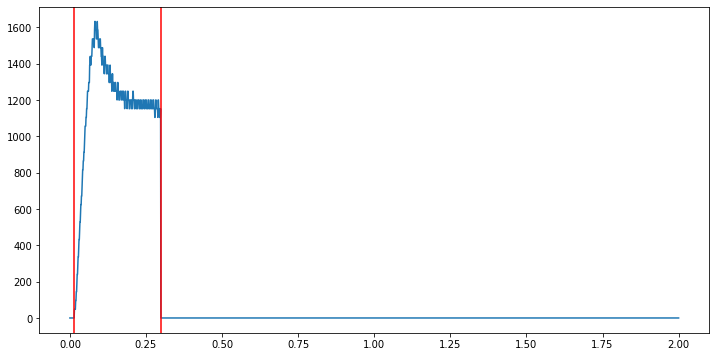

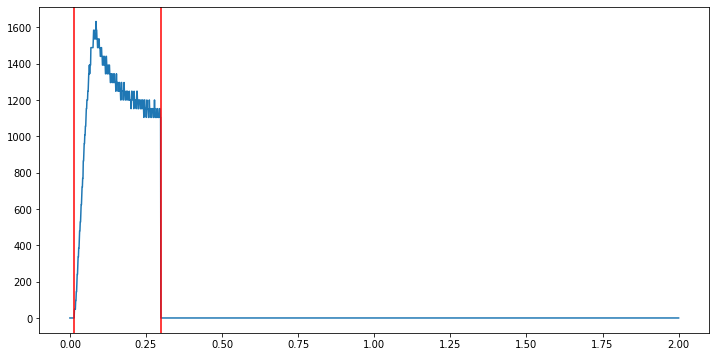

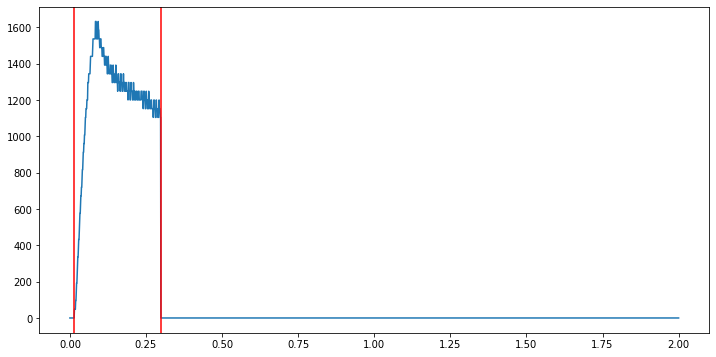

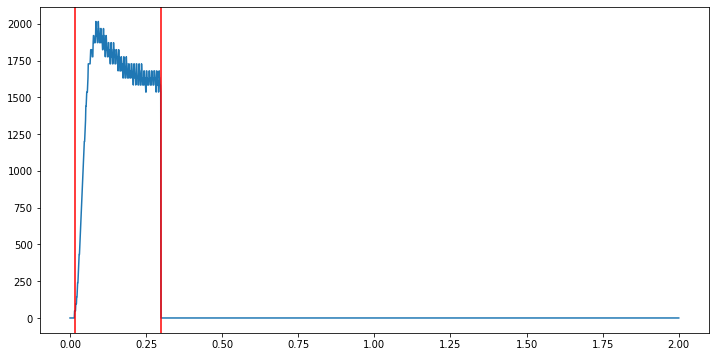

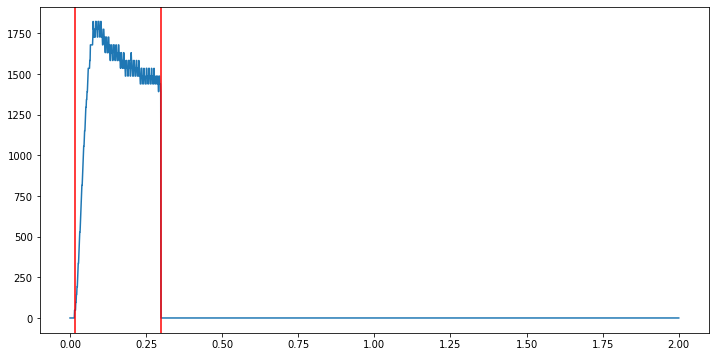

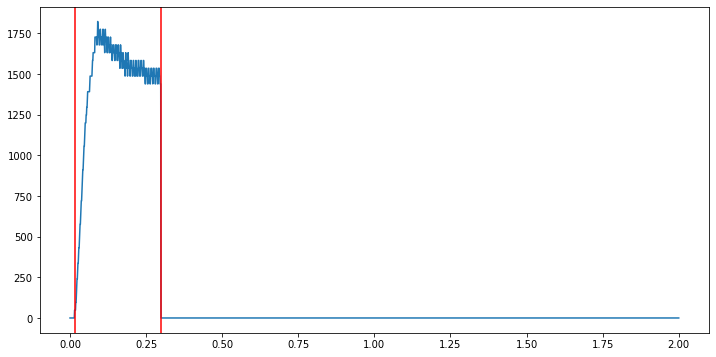

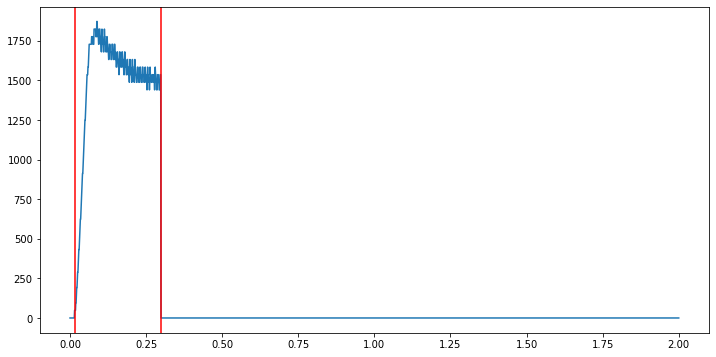

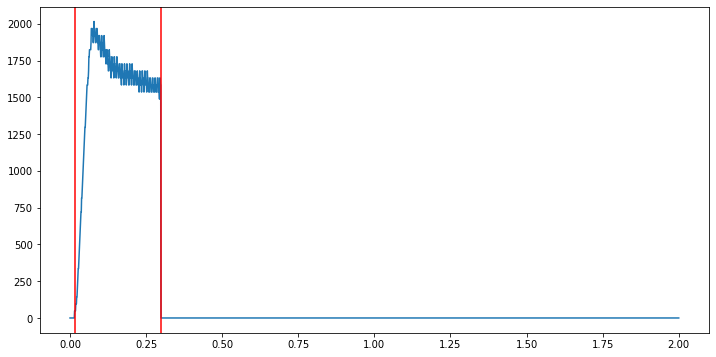

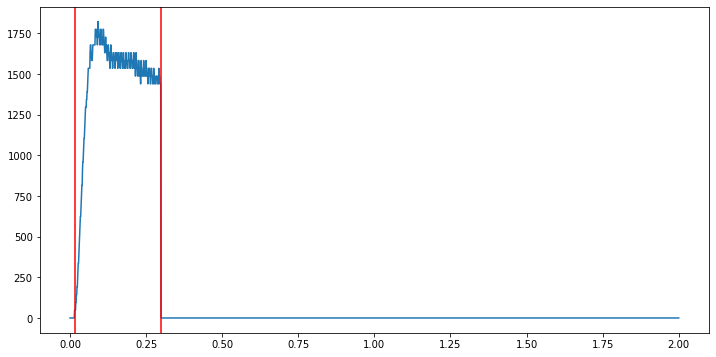

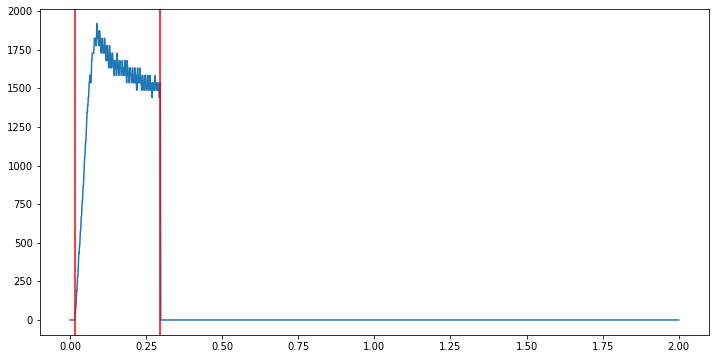

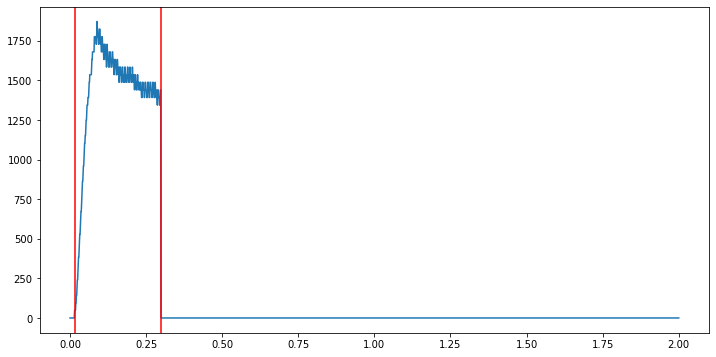

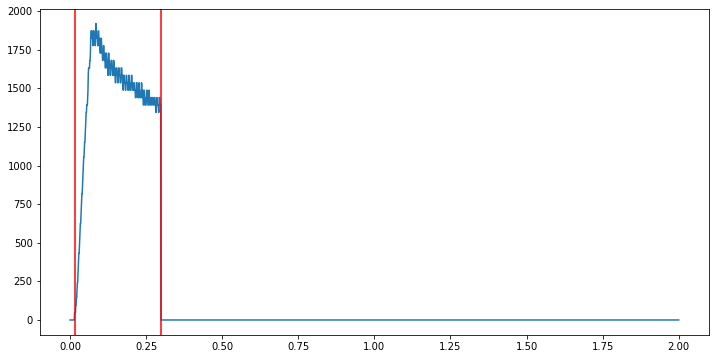

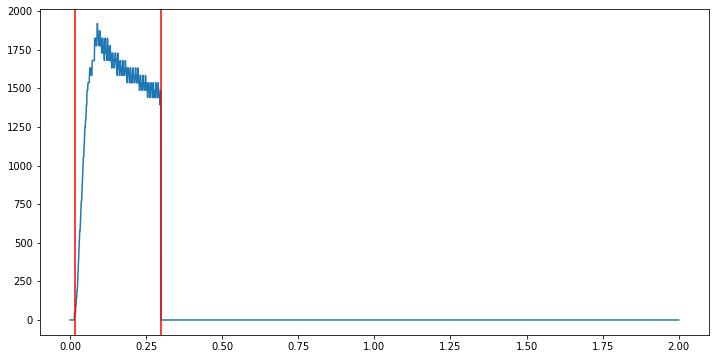

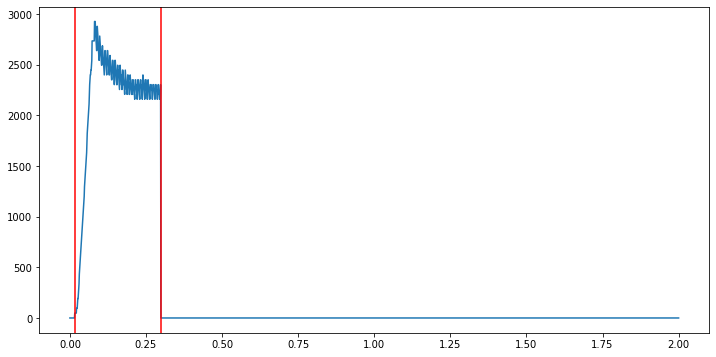

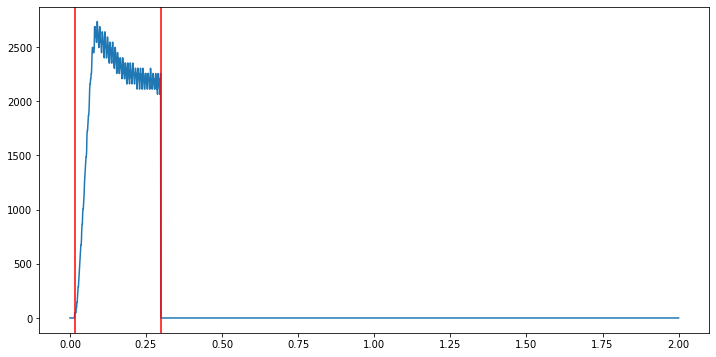

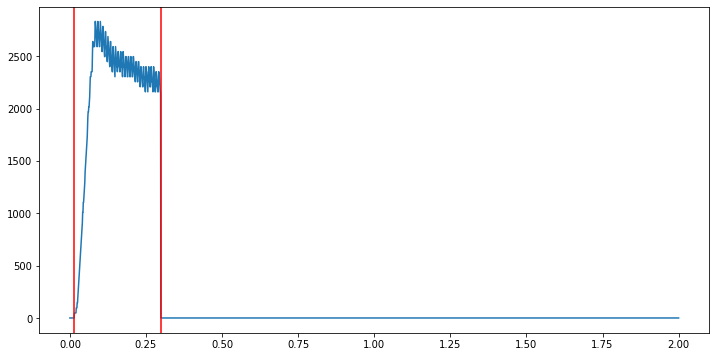

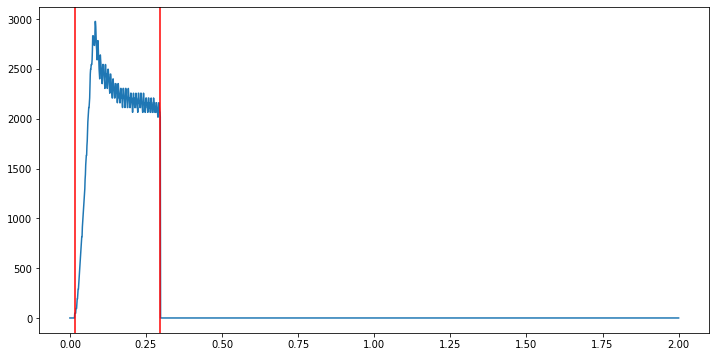

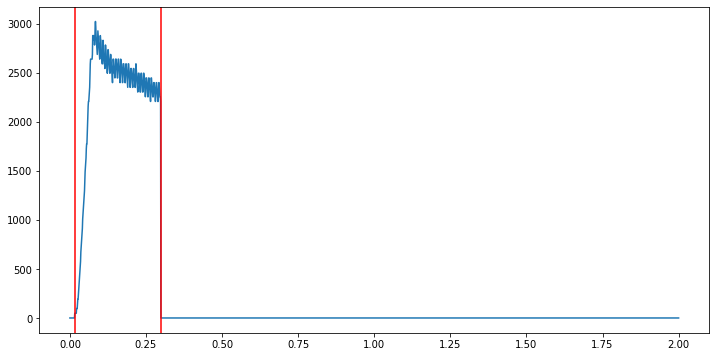

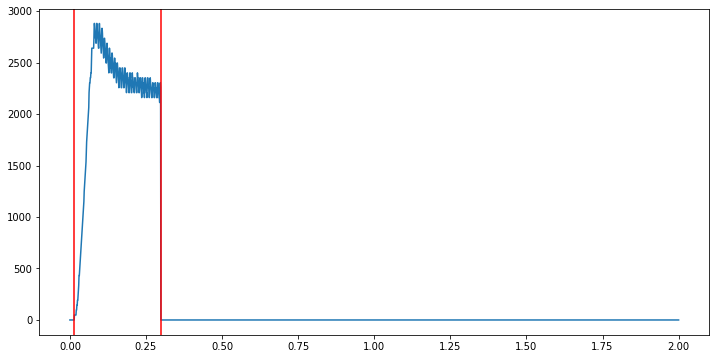

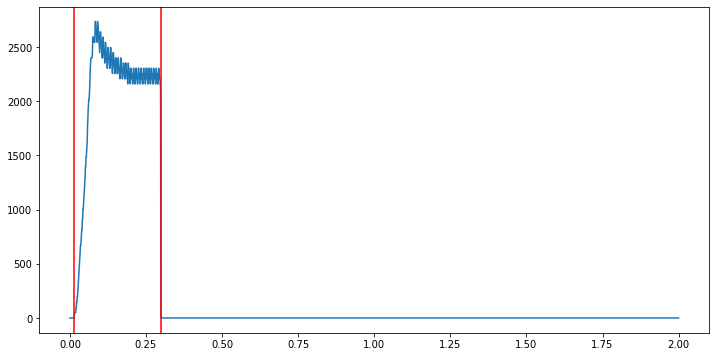

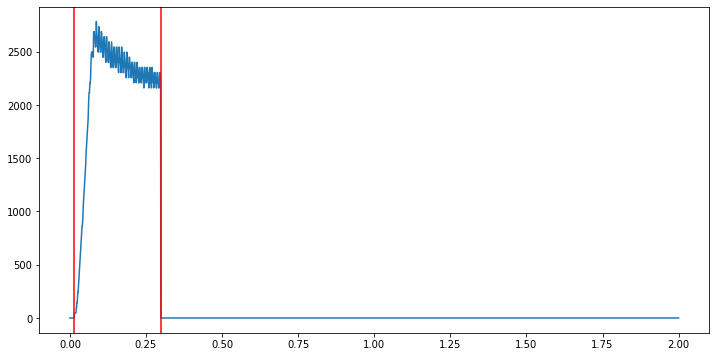

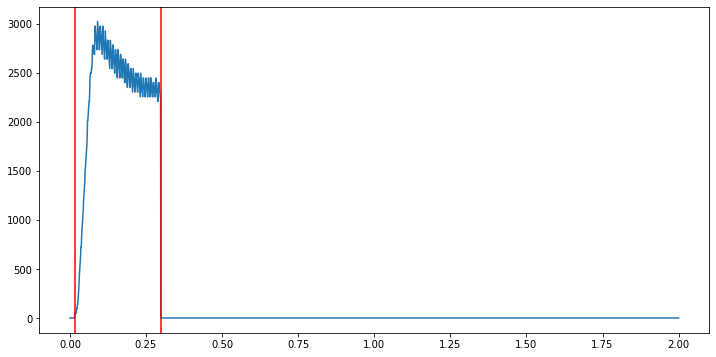

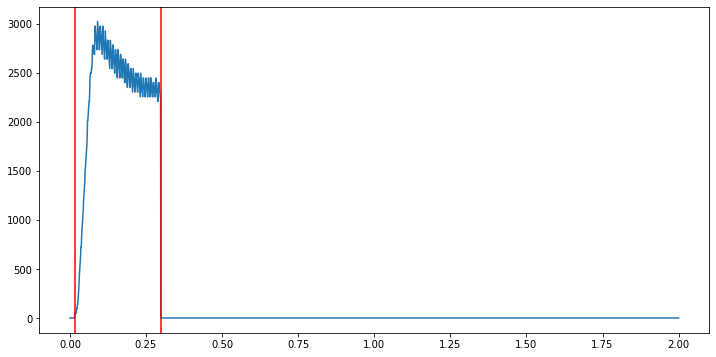

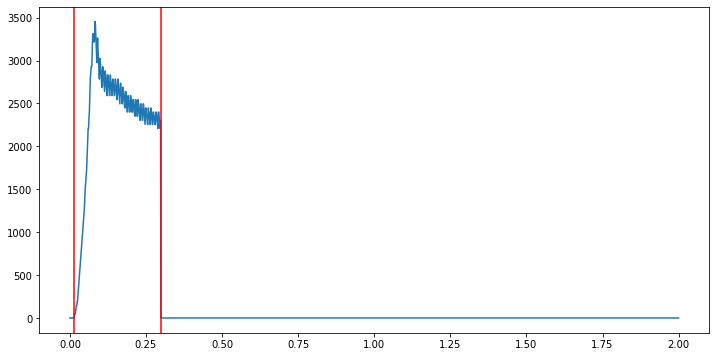

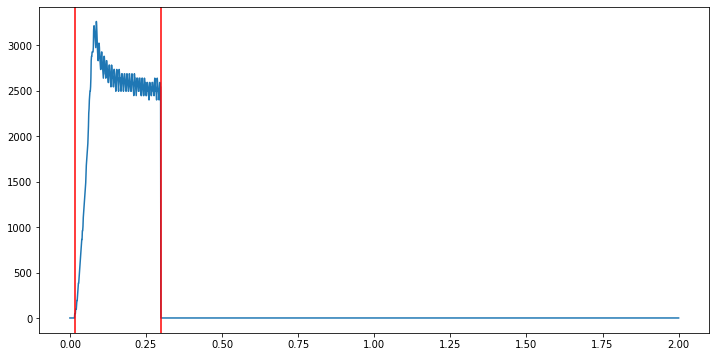

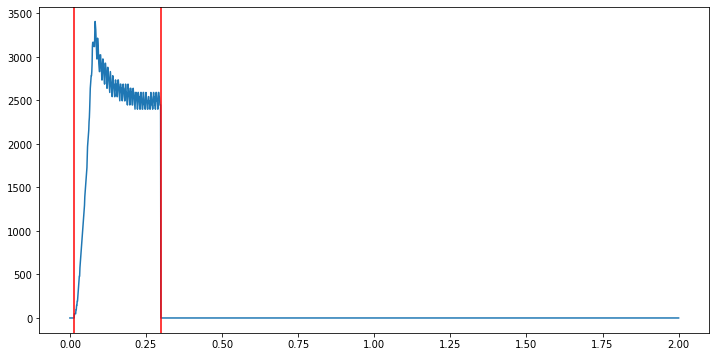

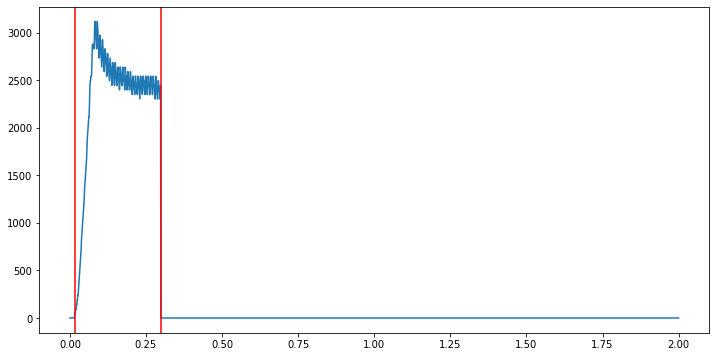

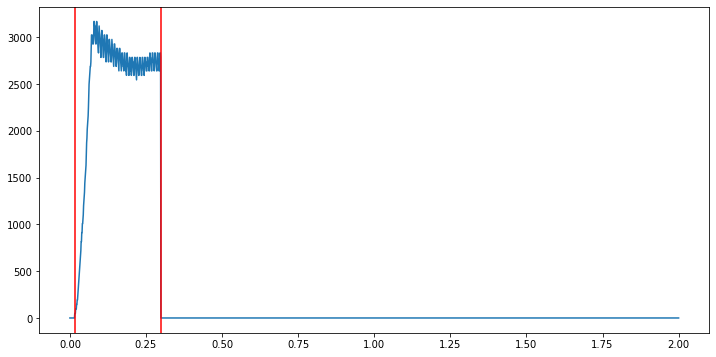

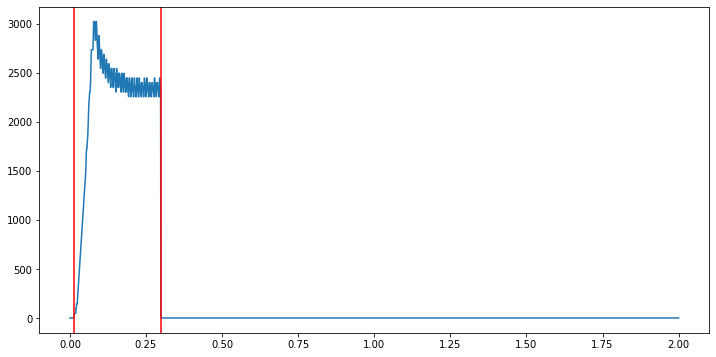

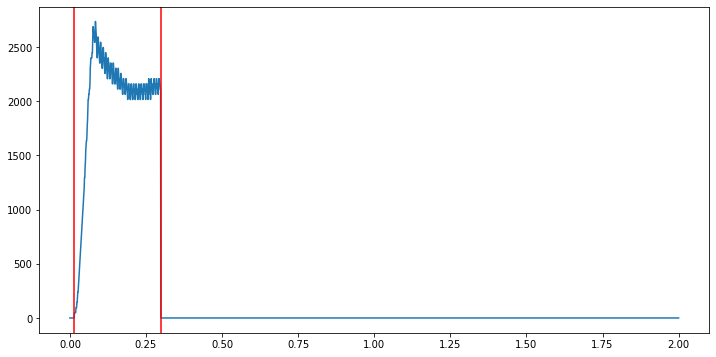

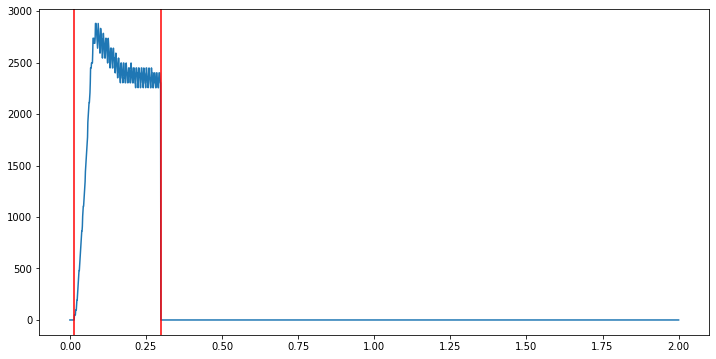

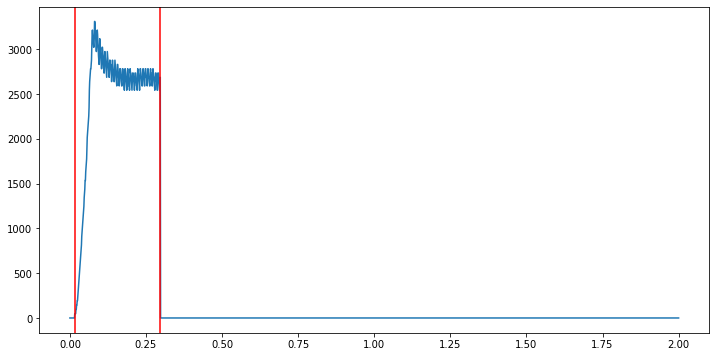

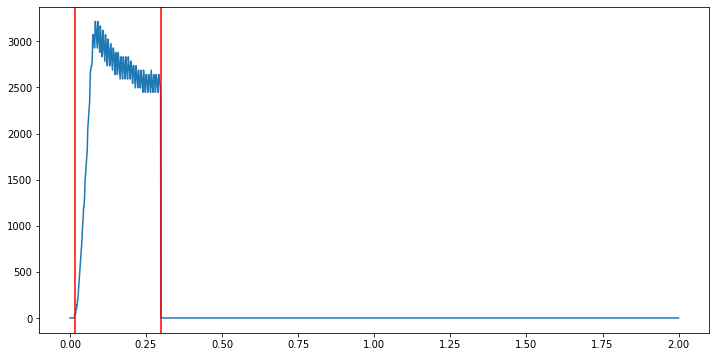

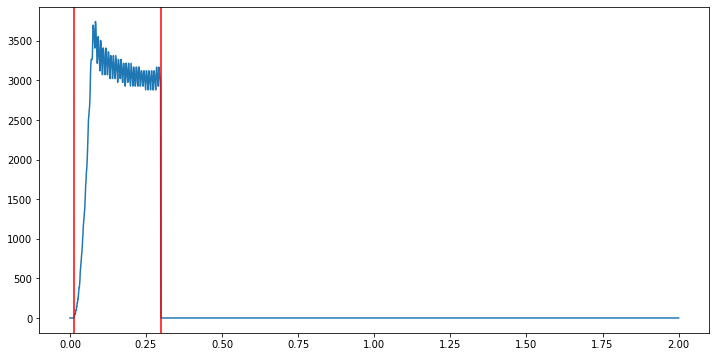

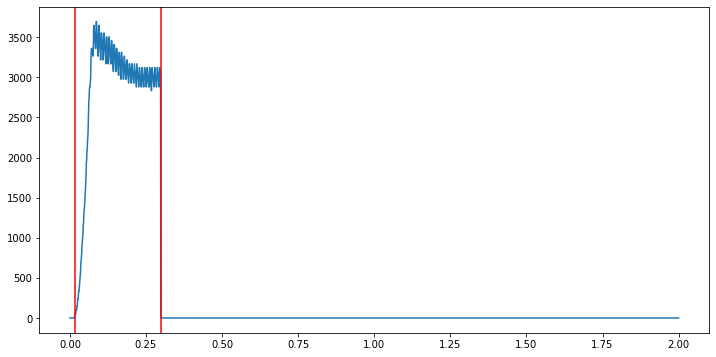

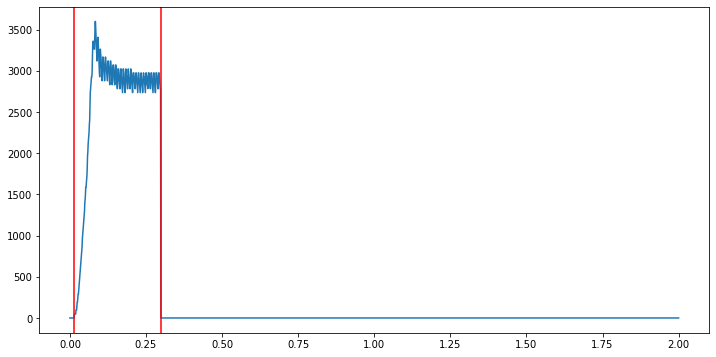

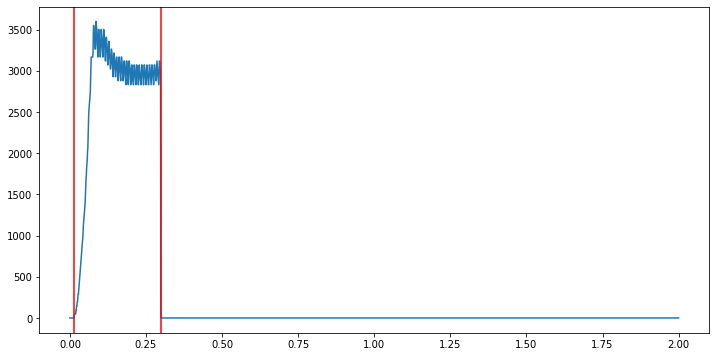

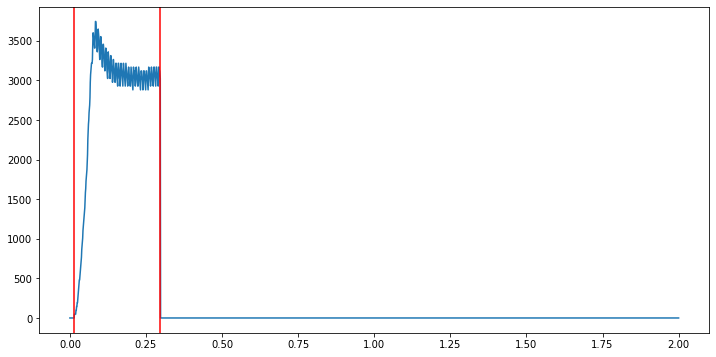

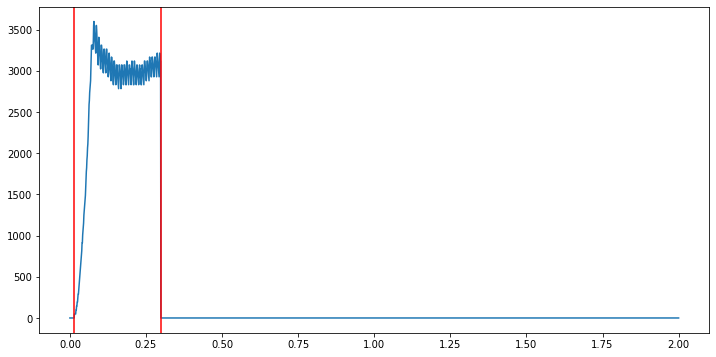

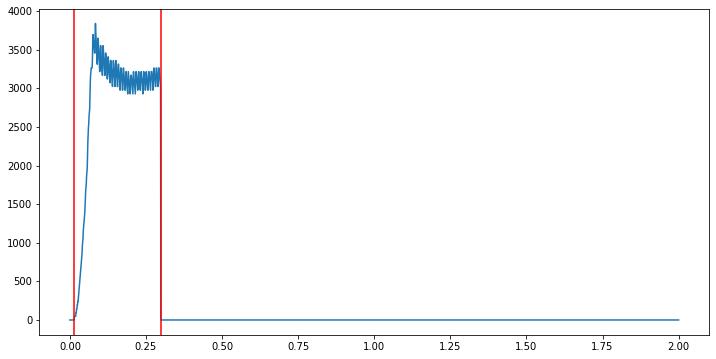

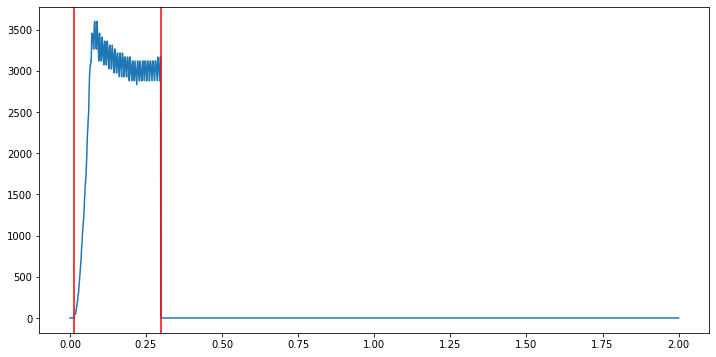

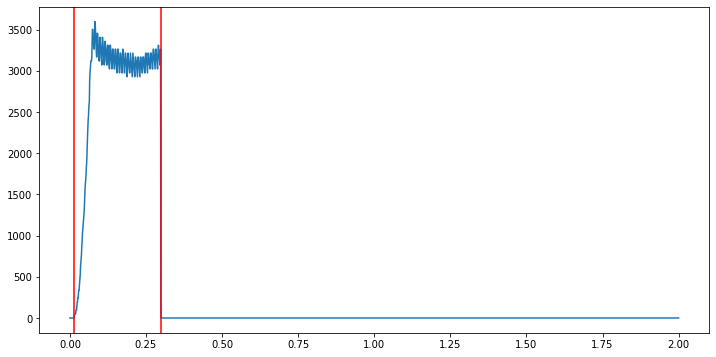

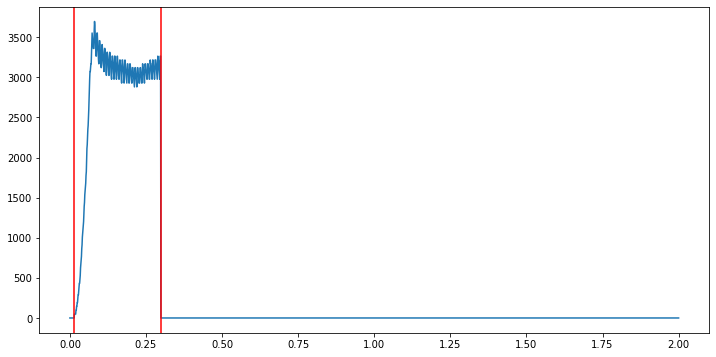

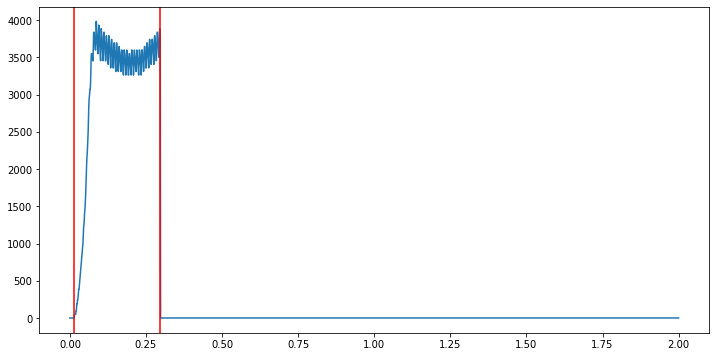

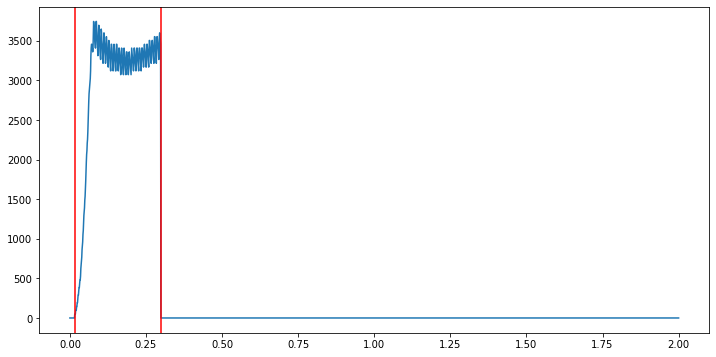

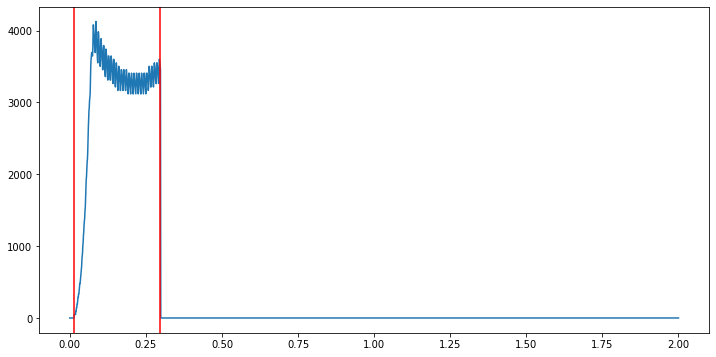

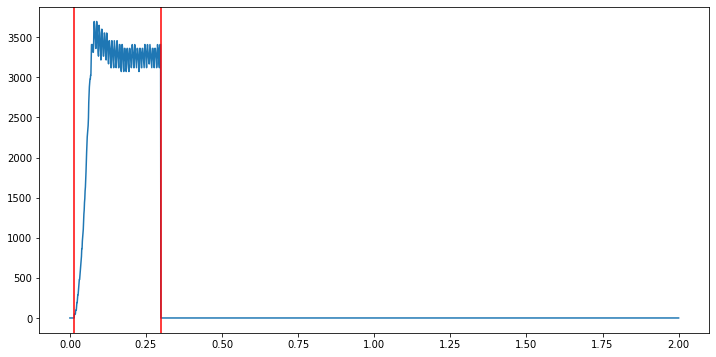

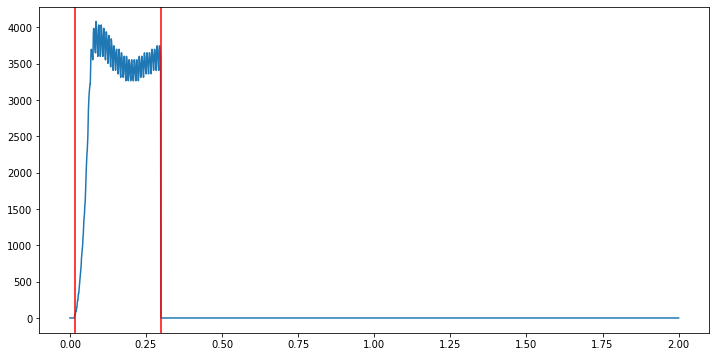

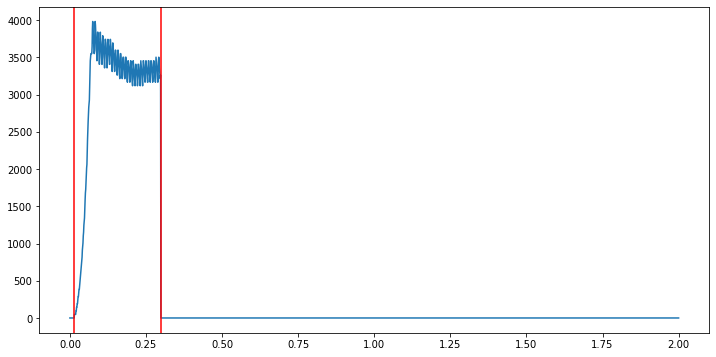

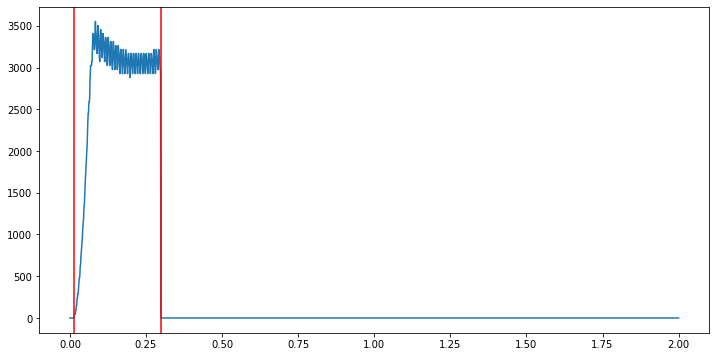

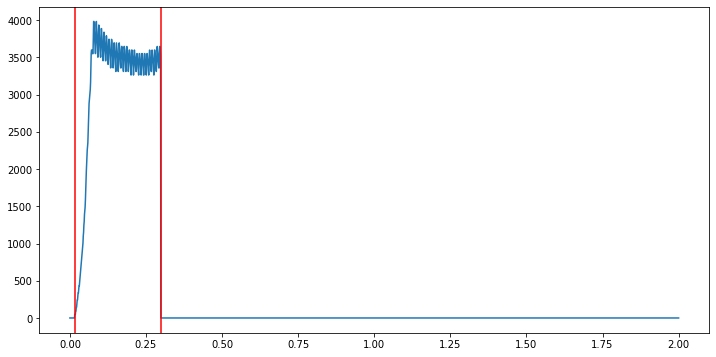

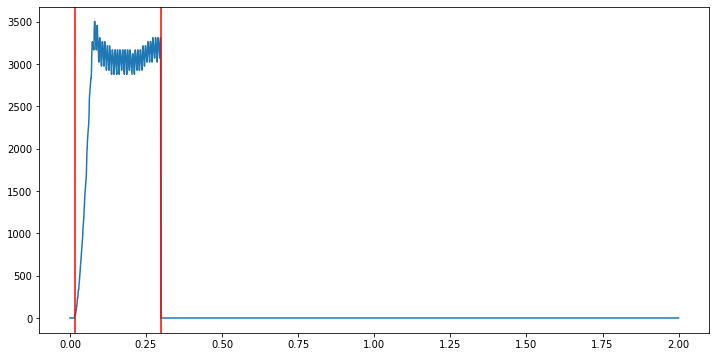

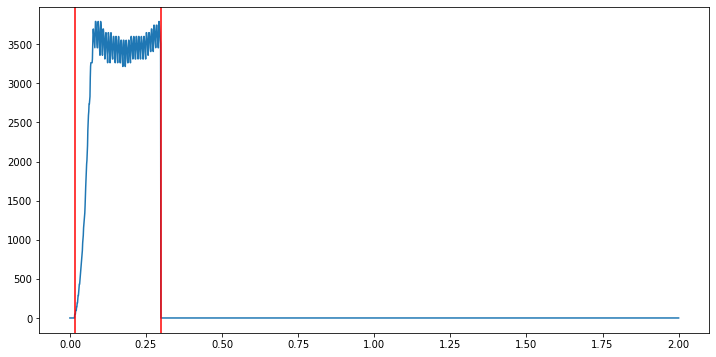

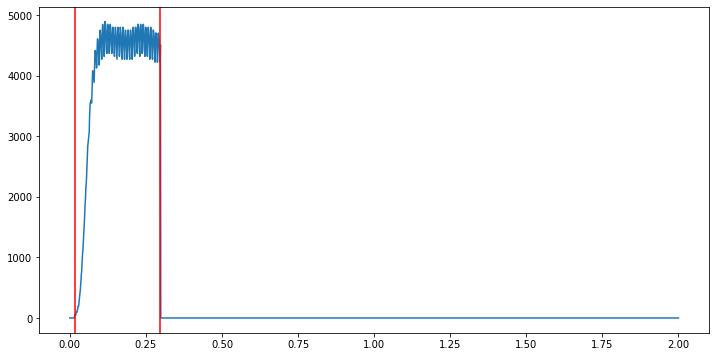

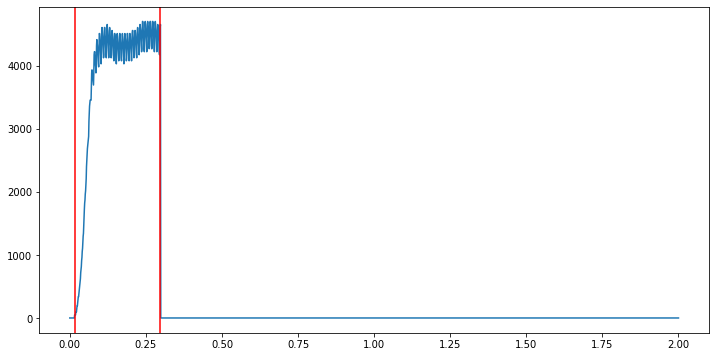

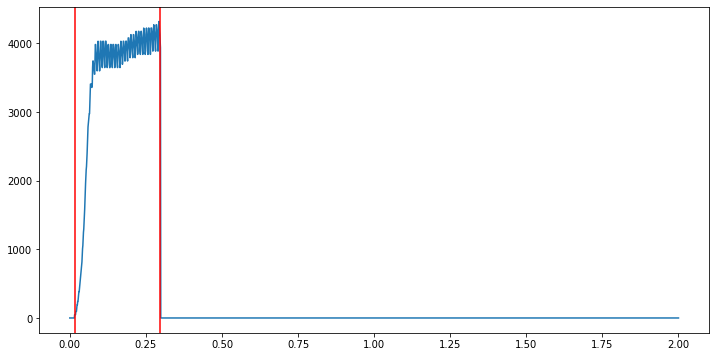

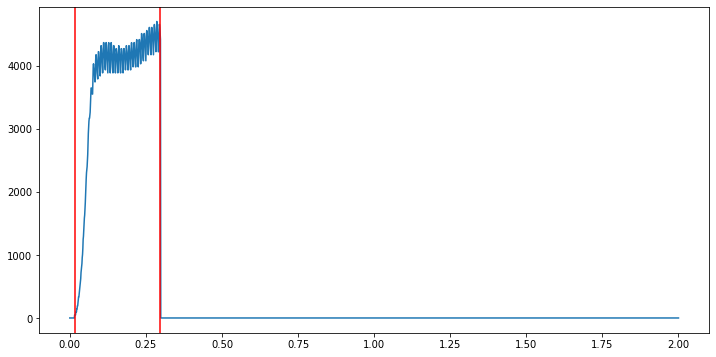

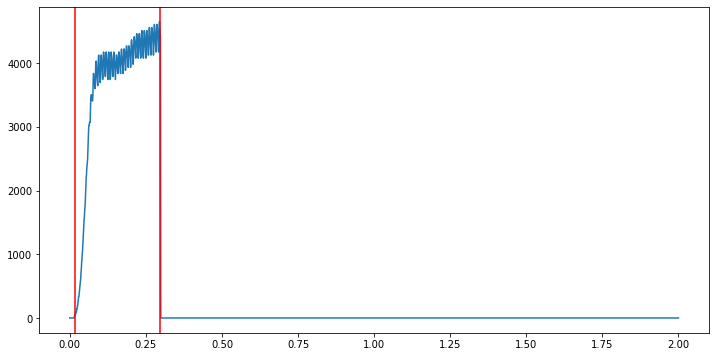

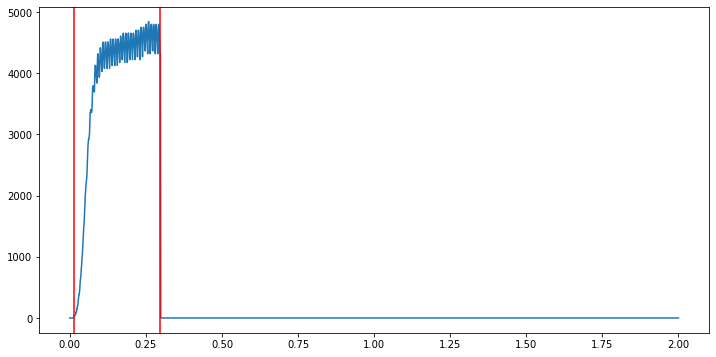

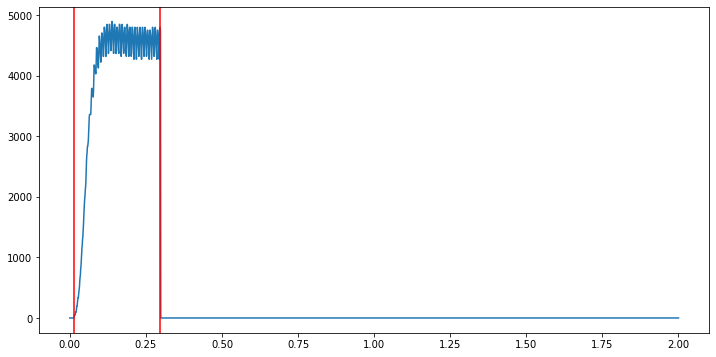

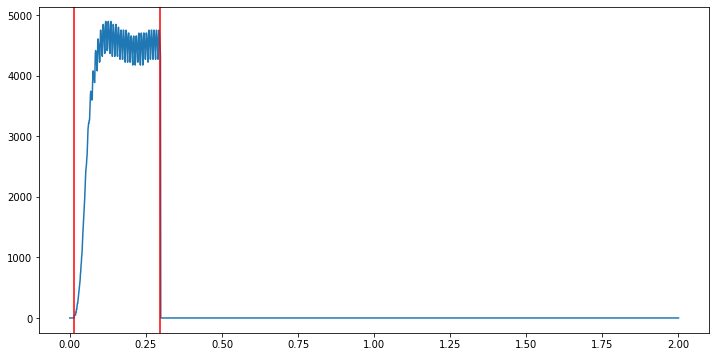

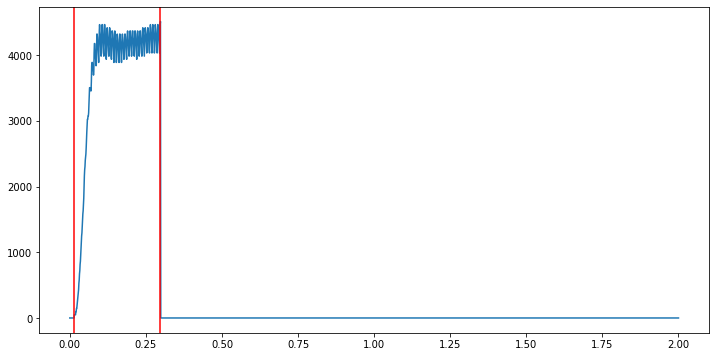

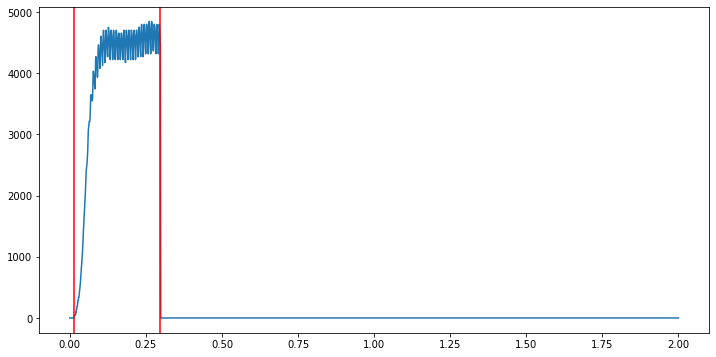

In [9]:
# segmented power signal
for i,sig in enumerate(data_buf['power']):
    fig = plt.figure(figsize=(12,6))
    plt.plot(sig[:,0],sig[:,1])
    for ind in seg_ind['power'][i]:
        plt.axvline(x=sig[ind,0],color='r')

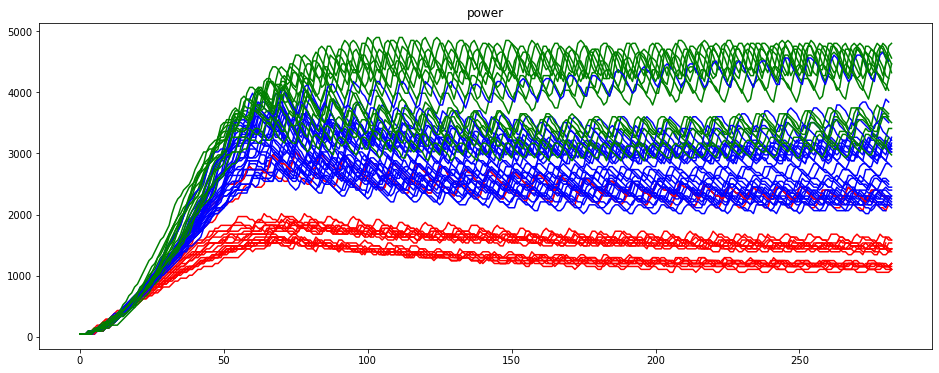

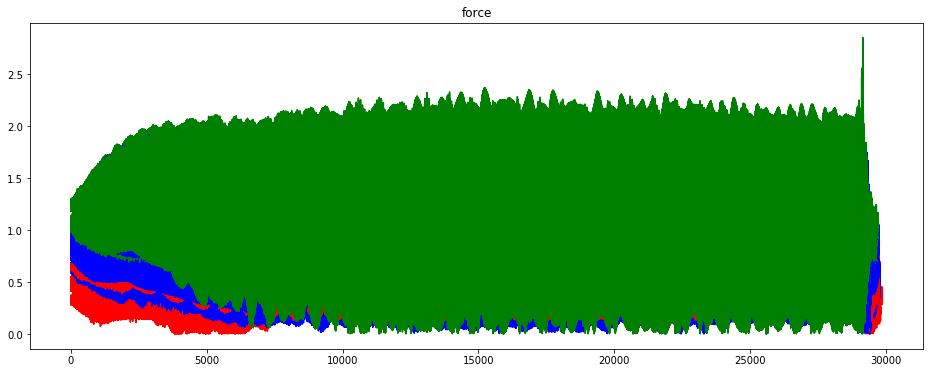

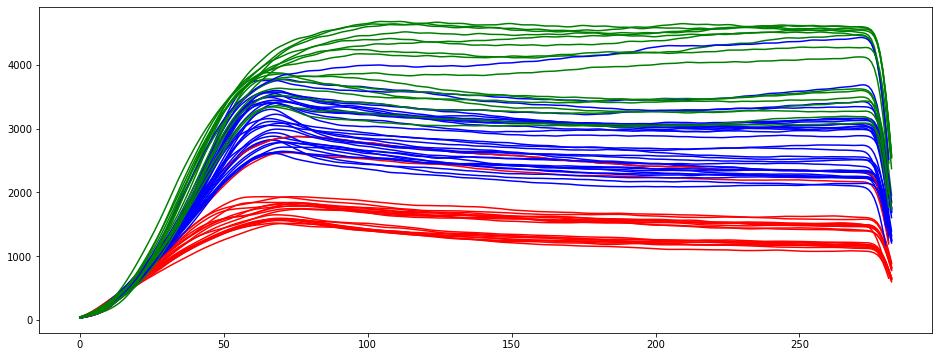

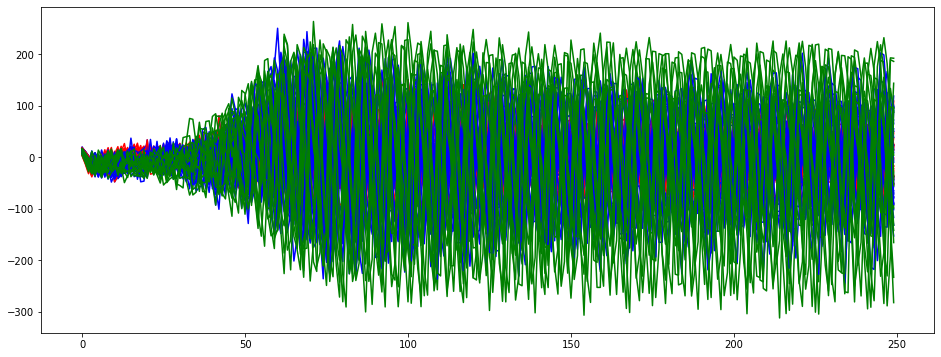

In [100]:
# preprocessed data visualization
for signal in signal_type:
    fig = plt.figure(figsize = (16, 6))
    class_color={'I':'r', 'II':'g', 'III':'b'}
    l = len(data[signal])
    for i in range(l):
        color_tmp = class_color[descriptions.loc[i+1,'Class Label']]
        plt.title(signal)
        plt.plot(data[signal][i][:,1],color=color_tmp)
    plt.show()
    
low_pass_fir_filter=pd.read_csv(data_path+'eqnum.csv',header=None).values[0]

# low-pass and high-pass filtered power signal
fig = plt.figure(figsize = (16, 6))
l = len(data['power'])
for i in range(l):
    color_tmp = class_color[descriptions.loc[i+1,'Class Label']]
    plt.plot(np.convolve(data['power'][i][:,1],low_pass_fir_filter,'same'),color=color_tmp)
plt.show()

fig = plt.figure(figsize = (16, 6))
for i in range(l):
    color_tmp = class_color[descriptions.loc[i+1,'Class Label']]
    plt.plot(data['power'][i][:250,1]-np.convolve(data['power'][i][:,1],low_pass_fir_filter,'same')[:250],color=color_tmp)
plt.show()

In [137]:
### 2. feature generation
from features import *

features = {label:[] for label in feat_labels}

### a. using information in 'discriptions' to fill features

features['welding_pressure'] = descriptions['Pressure [psi]'].tolist()
features['post_height'] = descriptions['Height [mm]'].tolist()
features['pre_height'] = descriptions['PreHeight [mm]'].tolist()
features['height_change'] = (descriptions['Height [mm]']-descriptions['PreHeight [mm]']).tolist()

### b. using information in data['power'] to fill features

tmp = data['power']
for sig in tmp:
    for label in feat_labels[4:8]:
        features[label].append(feature_gen_time(sig, label))

### c. using information in data['force'] to fill features

tmp = data['force']
for sig in tmp:
    for label in feat_labels[8:12]:
        features[label].append(feature_gen_freq(sig, label))


In [102]:
features

{'welding_pressure': [10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  30,
  30,
  30,
  30,
  30,
  30,
  30,
  30,
  30,
  30,
  40,
  40,
  40,
  40,
  40,
  40,
  40,
  40,
  40,
  40,
  50,
  50,
  50,
  50,
  50,
  50,
  50,
  50,
  50,
  50,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  75,
  75,
  75,
  75,
  75,
  75,
  75,
  75,
  75,
  75],
 'pre_height': [0.81,
  0.83,
  0.78,
  0.81,
  0.83,
  0.83,
  0.81,
  0.8,
  0.8,
  0.75,
  0.76,
  0.74,
  0.76,
  0.76,
  0.76,
  0.72,
  0.75,
  0.74,
  0.76,
  0.79,
  0.79,
  0.77,
  0.78,
  0.77,
  0.78,
  0.79,
  0.79,
  0.77,
  0.79,
  0.74,
  0.74,
  0.74,
  0.73,
  0.76,
  0.73,
  0.74,
  0.74,
  0.73,
  0.74,
  0.69,
  0.74,
  0.74,
  0.74,
  0.74,
  0.74,
  0.73,
  0.74,
  0.71,
  0.71,
  0.72,
  0.67,
  0.68,
  0.72,
  0.74,
  0.71,
  0.72,
  0.73,
  0.74,
  0.68,
  0.68,
  0.68,
  0.64,
  0.68,
  0.68,
  0.64,
  0.68,
  0.68,
  0.68,
  0.67],


In [138]:
# save the generated features to features.csv
tmp={}
tmp['experiment_no'] = list(range(2,71))
tmp['class_label'] = descriptions.loc[1:,'Class Label'].values.tolist()
tmp.update(features)

pd.DataFrame.from_dict(tmp).to_csv(data_path+'features.csv', index=False)

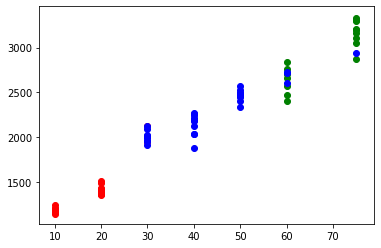

In [142]:
# feature 2d visualization
tmp1 = np.array(features['welding_pressure'])
tmp2 = np.array(features['time_f2'])
for c in classes:
    plt.scatter(tmp1[class_index[c]],tmp2[class_index[c]], color = class_color[c])


In [89]:
def fisher_ratio(f1,f2):
    miu1 = np.mean(f1)
    miu2 = np.mean(f2)
    
    sigma1_square = pvariance(f1)
    sigma2_square = pvariance(f2)
    
#     l1=len(f1); l2=len(f2);
#     return np.power(miu1-miu2,2)*l1*l2/(l1*sigma1_square + l2*sigma2_square)/(l1+l2)
    return np.power(miu1-miu2,2)/(sigma1_square + sigma2_square)

In [141]:
### 3. Fisher's ratio
welding_class = descriptions.loc[:,'Class Label'].values
classes = ['I','II','III']
class_index = {}
for c in classes:
    class_index[c] = np.where(welding_class == c)[0]

features_Fisher_ratio = {}
for label in feat_labels:
    features_Fisher_ratio[label] = []
    tmp = np.array(features[label])
    for c in classes[:2]:
        f_rat = fisher_ratio(tmp[class_index['III']],tmp[class_index[c]])
        features_Fisher_ratio[label].append(f_rat)
        
features_Fisher_ratio

{'welding_pressure': [4.531673855251736, 3.5471949084051726],
 'pre_height': [0.8193508746041789, 1.4088265666612372],
 'post_height': [1.9242975250746308, 2.88150334250005],
 'height_change': [2.5285455721594565, 3.014764687788375],
 'time_f1': [5.641629443228437, 2.5751626628088555],
 'time_f2': [6.327180245488405, 2.5372932426313763],
 'time_f3': [1.359772702679647, 1.5075038817653328],
 'time_f4': [5.201709247260846, 2.307315001648626],
 'freq_f1': [0.1011596416036717, 0.06672451873800593],
 'freq_f2': [4.26561126983486, 2.815831686406394],
 'freq_f3': [0.11307881563912163, 0.06670134436052184],
 'freq_f4': [0.1169725412463224, 0.13433006219199017]}

In [143]:
import csv
with open(data_path+'features_Fisher_ratio.csv', 'w') as f:
    for key in features_Fisher_ratio.keys():
        f.write("%s,%s,%s\n"%(key,features_Fisher_ratio[key][0],features_Fisher_ratio[key][1]))

['time_f2', 'time_f1', 'welding_pressure']


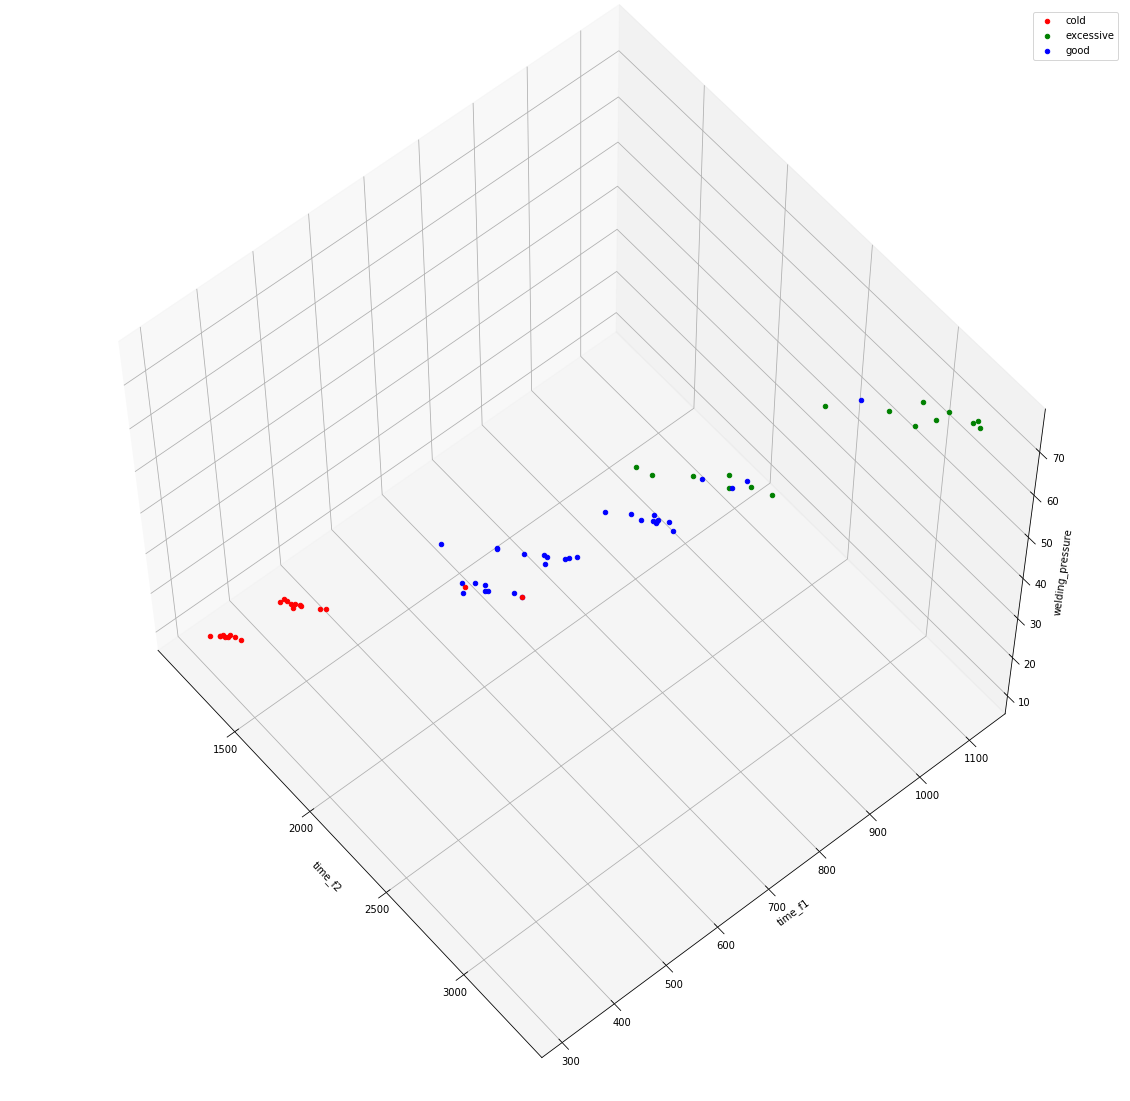

In [144]:
### 4. Feature selection
from heapq import nlargest
from mpl_toolkits import mplot3d

feature_f_rat_sum = {label:np.sum(features_Fisher_ratio[label]) for label in feat_labels[:8]}
maxFeatures = nlargest(3, feature_f_rat_sum, key = feature_f_rat_sum.get)
print(maxFeatures)

# maxFeatures=feat_labels[9:]

# visualize features
labels = descriptions['Class Label'].tolist()
x = features[maxFeatures[0]]
y = features[maxFeatures[1]]
z = features[maxFeatures[2]]
figure = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
# print(ax.azim,ax.elev)
ax.view_init(azim=-40,elev=60)
for i in range(len(labels)):
    if labels[i] == 'I':
        cold = ax.scatter(x[i],y[i],z[i], c = 'r')
    elif labels[i] == 'II':
        excessive = ax.scatter(x[i],y[i],z[i], c = 'g')
    elif labels[i] == 'III':
        good = ax.scatter(x[i],y[i],z[i], c = 'b')
ax.set_xlabel(maxFeatures[0])
ax.set_ylabel(maxFeatures[1])
ax.set_zlabel(maxFeatures[2])
ax.legend([cold, excessive, good], ['cold', 'excessive', 'good'])

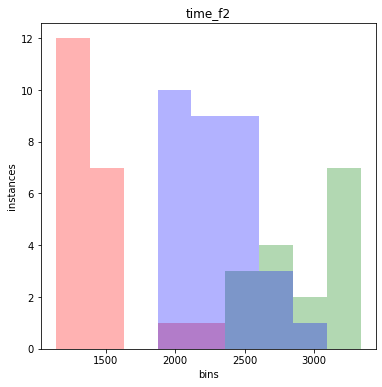

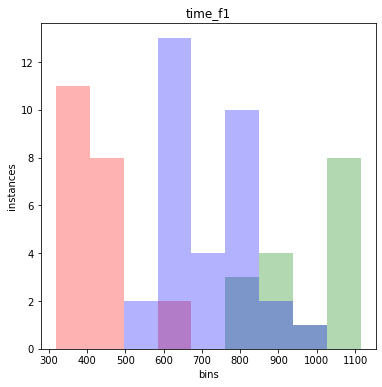

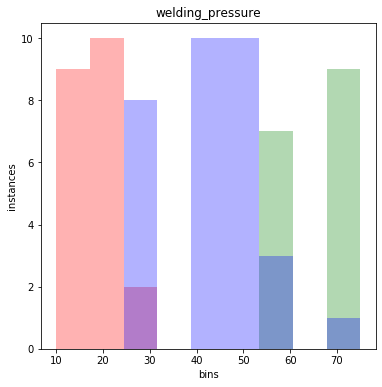

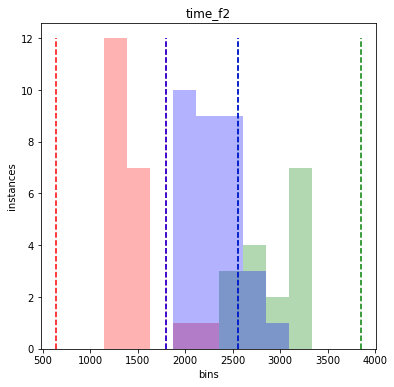

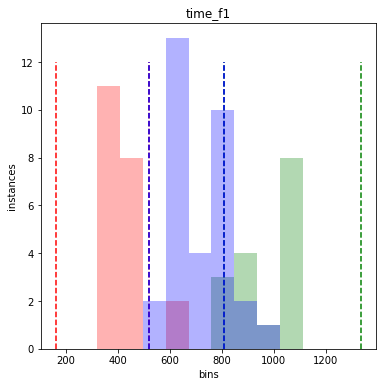

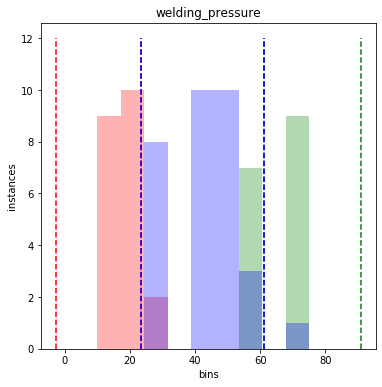

time_f2  missing rate:  0.13043478260869568
time_f1  missing rate:  0.1159420289855072
welding_pressure  missing rate:  0.14492753623188404


In [156]:
### 5. Classification
import math

# plot histograms for each feature
for label in maxFeatures:
    fig = plt.figure(figsize=(6, 6))
    feature_value = np.array(features[label])
    for c in classes:
        c_ind = class_index[c]
        plt.hist(feature_value[c_ind], alpha=0.3, color = class_color[c], range=[min(feature_value),max(feature_value)], bins=9)
#         plt.hist(feature_value[c_ind], label = 'test data', color = class_color[c], bins=int(math.sqrt(len(c_ind))))
    plt.title(label)
    plt.xlabel('bins')
    plt.ylabel('instances')
    plt.show()

# determine monitoring limits for each feature; using bayesian

featuresCL = {Feature:{
    'LCL': {label:[] for label in classes},
    'HCL': {label:[] for label in classes}} for Feature in maxFeatures}
for label in maxFeatures:    
    feature_value = np.array(features[label])    
    for c in classes:
        c_ind = class_index[c] 
        sigma = np.std(feature_value[c_ind])
        mean = np.mean(feature_value[c_ind])
        x1 = np.ones(3)
        x2 = np.ones(3)
        constant = 3
        x1 = x1*(mean - sigma*constant)
        x2 = x2*(mean + sigma*constant)
        featuresCL[label]['LCL'][c] = x1[0]
        featuresCL[label]['HCL'][c] = x2[0]
        if class_color[c] == 'b':
            featuresCL[label]['HCL']['I'] = (featuresCL[label]['HCL']['I'] + featuresCL[label]['LCL']['III'])/2
            featuresCL[label]['LCL']['III'] = featuresCL[label]['HCL']['I']
            featuresCL[label]['HCL']['III'] = (featuresCL[label]['HCL']['III'] + featuresCL[label]['LCL']['II'])/2
            featuresCL[label]['LCL']['II'] = featuresCL[label]['HCL']['III']
            
for label in maxFeatures:
    fig = plt.figure(figsize=(6, 6))
    feature_value = np.array(features[label])
    for c in classes:
        c_ind = class_index[c]
        plt.hist(feature_value[c_ind], alpha=0.3, color = class_color[c], range=[min(feature_value),max(feature_value)], bins=9)
#         plt.hist(feature_value[c_ind], label = 'test data', color = class_color[c], bins=int(math.sqrt(len(c_ind))))
        x1 = np.ones(3)
        x2 = np.ones(3)
        plt.plot(x1*featuresCL[label]['LCL'][c],[0,8,12],x2*featuresCL[label]['HCL'][c],[0,8,12],linestyle = '--', color = class_color[c])
    plt.title(label)
    plt.xlabel('bins')
    plt.ylabel('instances')
    plt.show()


# find misdetection rate

for label in maxFeatures: 
    feature_value = np.array(features[label]) 
    num_all = len(feature_value)
    num_right = 0
    for c in classes:
        c_ind = class_index[c]
        data_this_class = feature_value[c_ind] 
#         print(np.where(data_this_class < HCL[c])[0])
#         print(np.where(data_this_class > LCL[c])[0])
        for index in list(np.where(data_this_class < featuresCL[label]['HCL'][c])[0]):
            if index in list(np.where(data_this_class > featuresCL[label]['LCL'][c])[0]):
                 num_right += 1  
    print(label,' missing rate: ',1 - num_right/num_all)

In [154]:
features_classes={}
for label in maxFeatures:
    features_classes[label] = {}
    feature_value = np.array(features[label])
    for c in classes:
        c_ind = class_index[c]
        features_classes[label][c] = {}
        features_classes[label][c]['count'] = len(c_ind)
        features_classes[label][c]['mean'] = np.mean(feature_value[c_ind])
        features_classes[label][c]['std'] = np.std(feature_value[c_ind])

for label in maxFeatures:
    c = classes[0]
    
    for c in :
        features_classes[label][c]['count'] = len(c_ind)
        features_classes[label][c]['mean'] = np.mean(feature_value[c_ind])
        features_classes[label][c]['std'] = np.std(feature_value[c_ind])        
        

In [155]:
features_classes

{'time_f2': {'I': {'count': 21,
   'mean': 1375.0564674790778,
   'std': 244.3838217306046},
  'II': {'count': 16, 'mean': 2933.4, 'std': 304.34098894335676},
  'III': {'count': 32, 'mean': 2287.4227646454265, 'std': 268.02589346259117}},
 'time_f1': {'I': {'count': 21,
   'mean': 401.7120000000004,
   'std': 79.36900547982917},
  'II': {'count': 16, 'mean': 966.4740000000008, 'std': 122.64237869513143},
  'III': {'count': 32, 'mean': 709.8555000000006, 'std': 102.62179741044305}},
 'welding_pressure': {'I': {'count': 21,
   'mean': 16.666666666666668,
   'std': 6.42416074439621},
  'II': {'count': 16, 'mean': 68.4375, 'std': 7.441175562369161},
  'III': {'count': 32, 'mean': 43.59375, 'std': 10.914037334437701}}}